# Analyzing the World Happiness Report


## About the Dataset

The dataset comes from the **World Happiness Report 2021**. It ranks 149 countries based on their citizens' self-reported well-being, measured through the **Ladder score** and breaks down the contributing factors. 

### Scope
- **Countries:** 149  
- **Regions:** 10  
- **Year:** 2021  
- **Data Source:** World Happiness Report, using Gallup World Poll data and official statistics. 

---

## Understanding the Columns

### Core Columns
- **Country name:** Name of each country (e.g., Finland, Denmark).  
- **Regional indicator:** The region the country belongs to (e.g., Western Europe, Sub-Saharan Africa).  
- **Ladder score:** Main happiness measure — an average response to the question:  
  Imagine a ladder with steps from 0 (worst possible life) to 10 (best possible life).   

### Explanatory Factors
Happiness is shaped by several factors, each quantified in the dataset:

1. **Logged GDP per capita:** Economic prosperity, measured in terms of purchasing power parity (PPP).  
2. **Social support:** Strength of personal relationships — based on whether someone has support during difficult times.  
3. **Healthy life expectancy:** Average years a newborn can expect to live in good health.  
4. **Freedom to make life choices:** Perceived freedom in making life decisions.  
5. **Generosity:** National average donations to charity, adjusted for economic wealth.  
6. **Perceptions of corruption:** Trust in institutions — how widespread people believe corruption is in government or business.  

### Regression-Based Columns
The Ladder score is modeled as the sum of contributing factors:

Ladder score = GDP + Social support + Health + Freedom + Generosity + Corruption + {Dystopia + residual}


- **Dystopia score (2.43):** A hypothetical "worst-case" country used as a baseline for comparison.  
- **Explained by [factor]:** Quantifies how much each factor contributes to a country’s happiness.  
- **Dystopia + residual:** Captures what cannot be explained by the six main factors — like cultural, historical, or political influences.  


---

## Key Correlations: What Drives Happiness?

### Happiness vs. GDP per capita
- Strong positive correlation: Countries with higher GDP scores tend to have higher happiness scores.  
- However, **GDP isn't everything** — some Latin American countries show high happiness despite modest economic scores, hinting at the importance of social and cultural factors.

### Happiness vs. Social support
- One of the **strongest predictors** of happiness — even countries with lower GDP (like Costa Rica) rank high due to strong community bonds.  

### Happiness vs. Corruption
- Negative correlation: Countries with higher corruption scores report lower happiness levels.  
- Trust matters — countries like Finland and Denmark benefit from low perceived corruption.  

---

## Conclusion:

From the World Happiness Report data, we see that happiness isn't driven by a single factor — it's a **complex interplay** of:

1. **Economic strength:** GDP per capita matters, but it’s not the whole story.  
2. **Social connections:** A supportive community boosts happiness, even when wealth is limited.  
3. **Health and freedom:** Long, healthy lives and personal autonomy are key contributors.  
4. **Trust in institutions:** Low corruption increases national well-being.  


In [1167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize, OrdinalEncoder
%matplotlib inline

### Set Plot Style
Lets set a plot style and customize the appearance of the plots, including colors, fonts, and grid lines.

In [1168]:
plt.style.use('seaborn-v0_8-darkgrid')

# Custom color palette and background
background_color = '#F5F5F5'  # Light gray background
text_color = '#2D3047'        # Dark blue-gray for text
accent_color = '#E63946'      # Vibrant red accent
title_font_size = 18
label_font_size = 14
tick_font_size = 12

# Apply custom styling
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana', 'Arial', 'Helvetica']
plt.rcParams['figure.facecolor'] = background_color
plt.rcParams['axes.facecolor'] = background_color
plt.rcParams['axes.labelcolor'] = text_color
plt.rcParams['axes.titlecolor'] = text_color
plt.rcParams['axes.edgecolor'] = text_color
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color
plt.rcParams['grid.color'] = '#E0E0E0'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.grid'] = True

This function sets the titles and labels for the plots with specified font sizes and colors, so we have a consistent titles.

In [1169]:
def set_plot_titles(title, xlabel=None, ylabel=None):
    plt.background_color = background_color
    plt.text_color = text_color
    plt.title(title, fontsize=title_font_size, color=text_color, pad=20, fontweight='bold')
    if xlabel:
        plt.xlabel(xlabel, fontsize=label_font_size, color=text_color, fontweight='bold')
    if ylabel:
        plt.ylabel(ylabel, fontsize=label_font_size, color=text_color, fontweight= 'bold')
    if plt.gca().get_legend_handles_labels()[1]:  # Check if there are labels for the legend
        plt.legend(fontsize=label_font_size)
    plt.xticks(fontsize=tick_font_size, rotation=45)
    plt.yticks(fontsize=tick_font_size)
    plt.tight_layout()


This function returns the numeric and categorical columns of a given dataset.

In [1170]:
def colums(data):
    print(f"Dataset Shape: {data.shape}")
    numeric_cols = data.select_dtypes(include=['number']).columns
    object_cols = data.select_dtypes(include=['object']).columns

    if numeric_cols.empty:
        print("No numeric columns found.")
    else:
        print("Numeric Columns:")
        for col in numeric_cols:
            print(f"- {col}")

    print()  # Add a blank line for separation

    if object_cols.empty:
        print("No object (string) columns found.")
    else:
        print("Object (String) Columns:")
        for col in object_cols:
            print(f"- {col}")

This function add the interpretations to the plots itself.

In [1171]:
def add_interpretation(text, fontsize=12, wrap=True, horizontalalignment='left', verticalalignment='bottom', x=0.01, y=-0.1, text_color='black', bg_color='white', padding=0.02):
    #text = axhline(y=y + 0.05, color='black', linewidth=1.5, linestyle='--', xmin=x, xmax=x + 0.98) + text
    plt.figtext(x, y, text, wrap=wrap, horizontalalignment=horizontalalignment, verticalalignment=verticalalignment, fontsize=fontsize, color=text_color, bbox=dict(facecolor=bg_color, alpha=0.5, boxstyle='round,pad={}'.format(padding)))
    plt.tight_layout(rect=[0, 0.2, 1, 1])  # Adjust layout to make room for the text


In [1172]:
world_happiness_through_years = pd.read_csv('archive/world-happiness-report.csv')
data = pd.read_csv('archive/world-happiness-report-2021.csv')

data.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [1173]:
colums(data)

Dataset Shape: (149, 20)
Numeric Columns:
- Ladder score
- Standard error of ladder score
- upperwhisker
- lowerwhisker
- Logged GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Ladder score in Dystopia
- Explained by: Log GDP per capita
- Explained by: Social support
- Explained by: Healthy life expectancy
- Explained by: Freedom to make life choices
- Explained by: Generosity
- Explained by: Perceptions of corruption
- Dystopia + residual

Object (String) Columns:
- Country name
- Regional indicator


In [1174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

#### Feature Selection
Lets select relevant columns for our analysis.

In [1175]:
data_columns = ['Country name', 'Ladder score', 'Regional indicator', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [1176]:
happy_df = data[data_columns]
# Rename the columns for easier access
happy_df.columns = ['Country', 'Happiness', 'Region', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']


In [1177]:
happy_df.head()

Country  Happiness          Region     GDP  Social  Health  Freedom  \
0      Finland      7.842  Western Europe  10.775   0.954    72.0    0.949   
1      Denmark      7.620  Western Europe  10.933   0.954    72.7    0.946   
2  Switzerland      7.571  Western Europe  11.117   0.942    74.4    0.919   
3      Iceland      7.554  Western Europe  10.878   0.983    73.0    0.955   
4  Netherlands      7.464  Western Europe  10.932   0.942    72.4    0.913   

   Generosity  Corruption  
0      -0.098       0.186  
1       0.030       0.179  
2       0.025       0.292  
3       0.160       0.673  
4       0.175       0.338

In [1178]:
happy_df.shape

(149, 9)

In [1179]:
happy_df.isnull().sum()

Country       0
Happiness     0
Region        0
GDP           0
Social        0
Health        0
Freedom       0
Generosity    0
Corruption    0
dtype: int64

In [1180]:
# Descriptive statistics by region
regional_stats = happy_df.groupby('Region').agg({
    'Happiness': ['mean', 'std', 'min', 'max'],
    'GDP': 'mean',
    'Health': 'mean'
}).round(2)

print("Regional Statistics:")
print(regional_stats.sort_values(('Happiness', 'mean'), ascending=False))

Regional Statistics:
                                   Happiness                      GDP Health
                                        mean   std   min   max   mean   mean
Region                                                                      
North America and ANZ                   7.13  0.14  6.95  7.28  10.81  72.32
Western Europe                          6.91  0.66  5.54  7.84  10.82  73.03
Central and Eastern Europe              5.98  0.49  5.10  6.96  10.11  68.34
Latin America and Caribbean             5.91  0.69  3.62  7.07   9.37  67.08
East Asia                               5.81  0.44  5.34  6.58  10.37  71.25
Commonwealth of Independent States      5.47  0.44  4.88  6.18   9.40  65.01
Southeast Asia                          5.41  0.61  4.43  6.38   9.42  64.89
Middle East and North Africa            5.22  1.00  3.66  7.16   9.67  65.61
Sub-Saharan Africa                      4.49  0.65  3.14  6.05   8.08  55.89
South Asia                              4.44  0.99  2.5

Overall, the data highlights a clear trend where regions with higher GDP and better health outcomes tend to report higher happiness levels. This underscores the importance of economic stability and health in contributing to the overall happiness and well-being of populations.

In [1181]:
happy_df.describe().T


count       mean       std     min     25%     50%     75%     max
Happiness   149.0   5.532839  1.073924   2.523   4.852   5.534   6.255   7.842
GDP         149.0   9.432208  1.158601   6.635   8.541   9.569  10.421  11.647
Social      149.0   0.814745  0.114889   0.463   0.750   0.832   0.905   0.983
Health      149.0  64.992799  6.762043  48.478  59.802  66.603  69.600  76.953
Freedom     149.0   0.791597  0.113332   0.382   0.718   0.804   0.877   0.970
Generosity  149.0  -0.015134  0.150657  -0.288  -0.126  -0.036   0.079   0.542
Corruption  149.0   0.727450  0.179226   0.082   0.667   0.781   0.845   0.939

In [1182]:
# summary statistics for categorical columns
happy_df.describe(include='O')

Country              Region
count       149                 149
unique      149                  10
top     Finland  Sub-Saharan Africa
freq          1                  36

In [1183]:
for column in happy_df.columns:
    min_value = happy_df[column].min()
    max_value = happy_df[column].max()
    print(f"{column}: Min = {min_value}, Max = {max_value}")

Country: Min = Afghanistan, Max = Zimbabwe
Happiness: Min = 2.523, Max = 7.842
Region: Min = Central and Eastern Europe, Max = Western Europe
GDP: Min = 6.635, Max = 11.647
Social: Min = 0.463, Max = 0.983
Health: Min = 48.478, Max = 76.953
Freedom: Min = 0.382, Max = 0.97
Generosity: Min = -0.288, Max = 0.542
Corruption: Min = 0.082, Max = 0.939


# Data Visualization

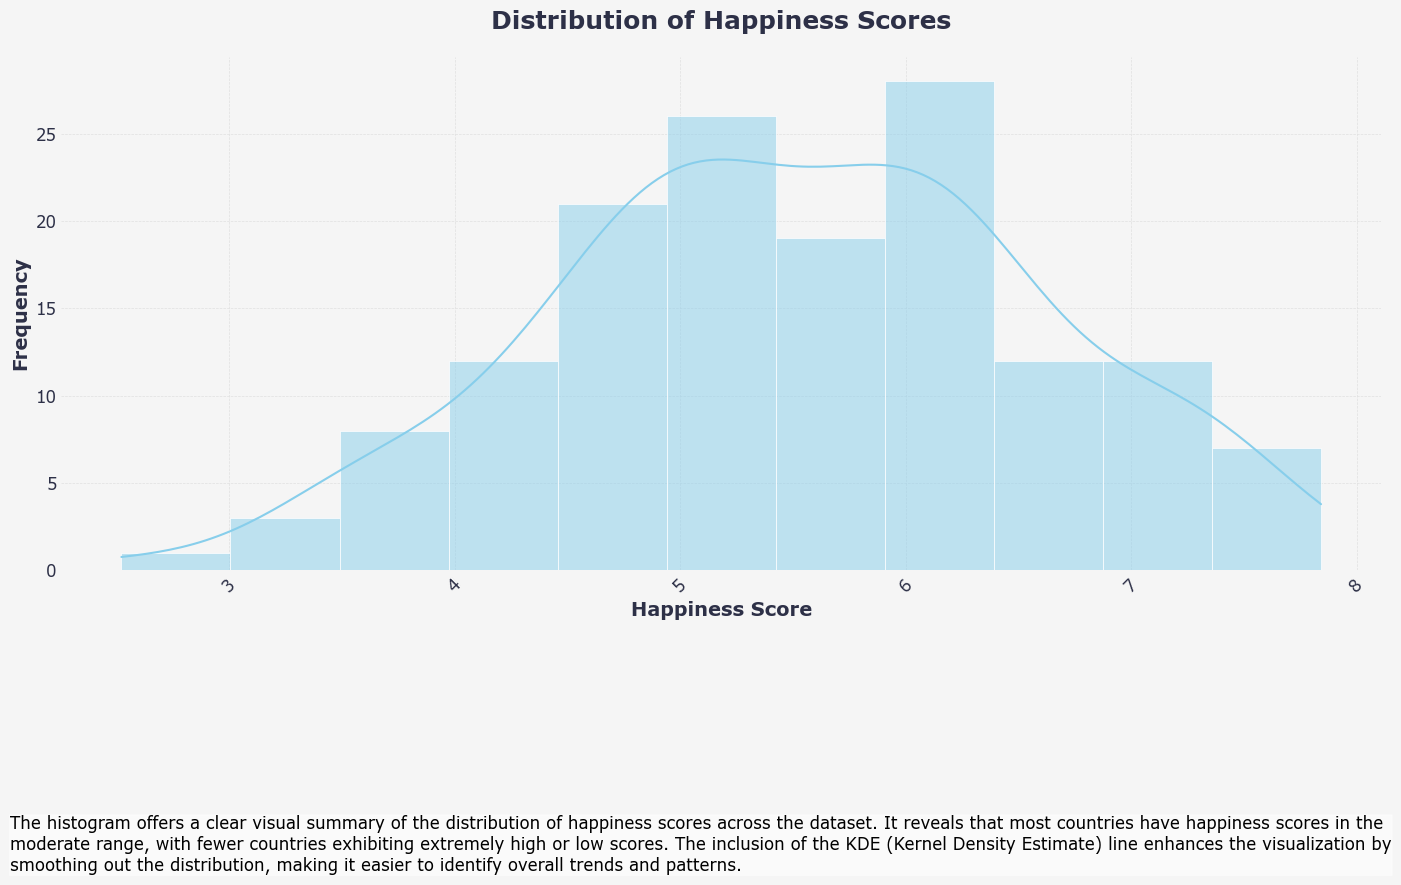

In [1184]:
sns.histplot(
    data=happy_df, 
    x='Happiness', 
    color = 'skyblue',
    linewidth=0.5,
    kde=True)

set_plot_titles('Distribution of Happiness Scores', 'Happiness Score', 'Frequency')

interpretation = (
    "The histogram offers a clear visual summary of the distribution of happiness scores across the dataset. "
    "It reveals that most countries have happiness scores in the moderate range, with fewer countries exhibiting "
    "extremely high or low scores. The inclusion of the KDE (Kernel Density Estimate) line enhances the visualization "
    "by smoothing out the distribution, making it easier to identify overall trends and patterns."
)

add_interpretation(interpretation)

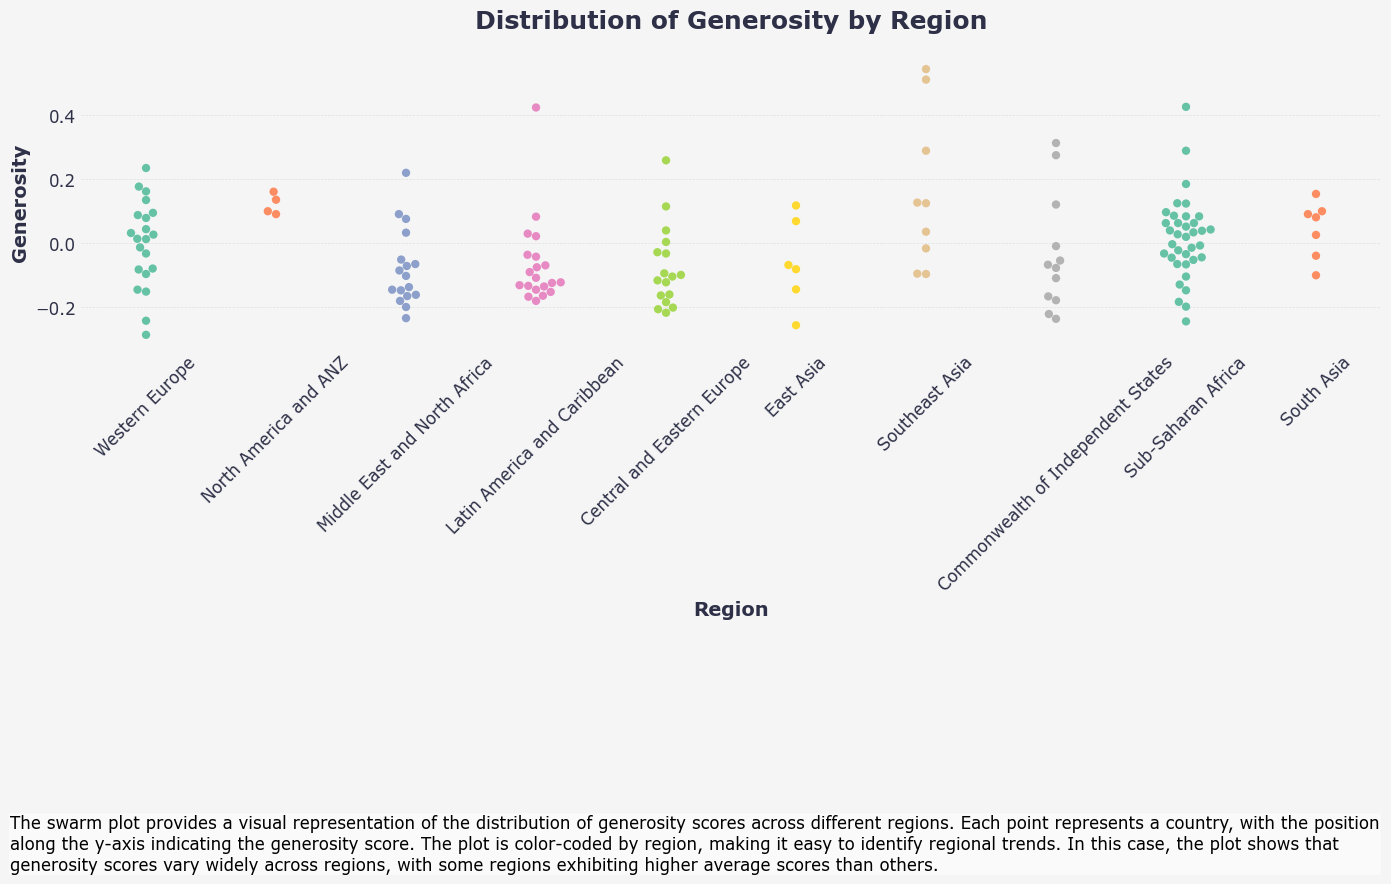

In [1185]:
sns.swarmplot(
    data=happy_df,
    x='Region',
    y='Generosity',
    hue='Region',
    palette='Set2',
    size=6
)

set_plot_titles('Distribution of Generosity by Region', 'Region', 'Generosity')

interpretation = (
    "The swarm plot provides a visual representation of the distribution of generosity scores across different regions. "
    "Each point represents a country, with the position along the y-axis indicating the generosity score. The plot is "
    "color-coded by region, making it easy to identify regional trends. In this case, the plot shows that generosity "
    "scores vary widely across regions, with some regions exhibiting higher average scores than others."
)

add_interpretation(interpretation)

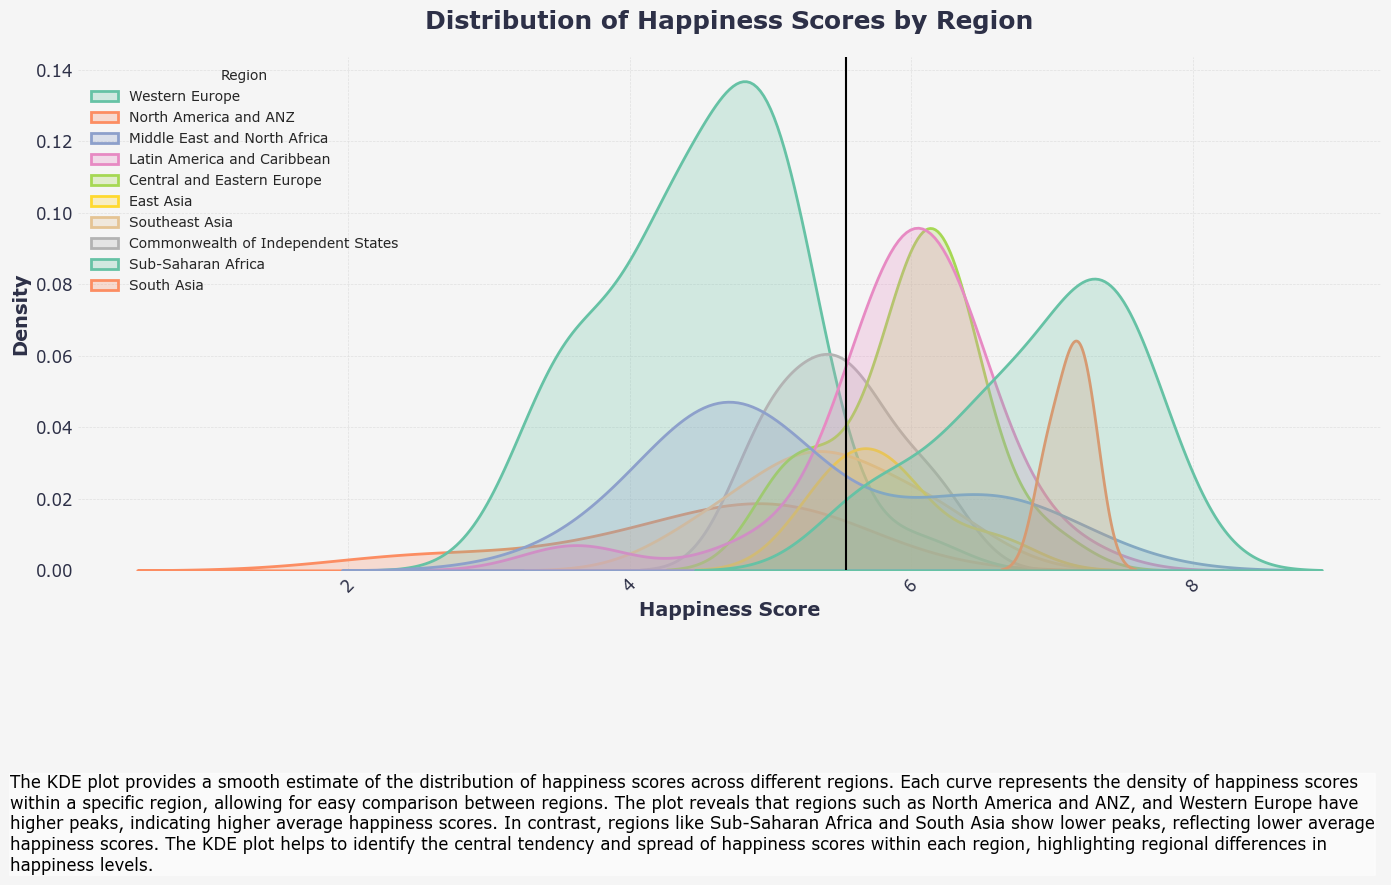

In [1186]:
sns.kdeplot(
    data =happy_df, 
    x = "Happiness", 
    hue = "Region", 
    fill = True, 
    linewidth = 2,
    palette = 'Set2')
plt.axvline(happy_df["Happiness"].mean(), c = "black")
set_plot_titles('Distribution of Happiness Scores by Region', 'Happiness Score', 'Density')

interpretation = (
    "The KDE plot provides a smooth estimate of the distribution of happiness scores across different regions. "
    "Each curve represents the density of happiness scores within a specific region, allowing for easy comparison between regions. "
    "The plot reveals that regions such as North America and ANZ, and Western Europe have higher peaks, indicating higher average happiness scores. "
    "In contrast, regions like Sub-Saharan Africa and South Asia show lower peaks, reflecting lower average happiness scores. "
    "The KDE plot helps to identify the central tendency and spread of happiness scores within each region, highlighting regional differences in happiness levels."
)

add_interpretation(interpretation)

In [1187]:
population_df = pd.read_csv('archive/WorldPopulation.csv')
population_df = population_df.loc[:, ~population_df.columns.str.contains('^Unnamed')]

population_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

Reshape the population data from wide to long format, converts the year column to integer, and filters out rows with missing population values.

In [1188]:
# Reshape the population data from wide to long format
population_long_df = population_df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                                        var_name="year",
                                        value_name="population")

# Convert the year column to integer
population_long_df['year'] = population_long_df['year'].astype(int)

# Filter out rows with missing population values
population_long_df = population_long_df.dropna(subset=['population'])

population_long_df.head(1)

Country Name Country Code     Indicator Name Indicator Code  year  \
0        Aruba          ABW  Population, total    SP.POP.TOTL  1960   

   population  
0     54922.0

In [1189]:

# Rename columns for consistency
population_long_df.rename(columns={'Country Name': 'Country name'}, inplace=True)

# Merge the datasets
merged_df = pd.merge(happy_df_years, population_long_df[['Country name', 'year', 'population']], on=['Country name', 'year'], how='left')

merged_df = pd.merge(merged_df, happy_df[['Country', 'Region']], left_on='Country name', right_on='Country', how='left')


merged_df = merged_df.dropna(subset=['population'])

merged_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'population', 'Country', 'Region'],
      dtype='object')

In [1190]:
print(merged_df.columns)

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'population', 'Country', 'Region'],
      dtype='object')


In [1191]:
data_columns = ['Country name', 'Life Ladder', 'Region', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'year', 'population']
merged_df = merged_df[data_columns]
# Rename the columns for easier access
merged_df.columns = ['Country', 'Happiness', 'Region', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Year', 'Population']


In [1192]:
merged_df.isnull().sum()


Country        0
Happiness      0
Region        44
GDP           11
Social        12
Health        14
Freedom       27
Generosity    55
Corruption    95
Year           0
Population     0
dtype: int64

In [1193]:

regions_w = pd.read_csv('archive/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')
regions_w.columns = regions_w.columns.str.strip()

# Select relevant columns
regions_w = regions_w[['TableName', 'Region']]

# Rename 'TableName' to 'Country' to match the column in merged_df
regions_w.rename(columns={'TableName': 'Country'}, inplace=True)

# Creating a mapping from 'Country' to 'Region' in regions_w
country_to_region = regions_w.set_index('Country')['Region'].to_dict()

# Fill missing 'Region' values in merged_df using the mapping

merged_df['Region'] = merged_df['Region'].fillna(merged_df['Country'].map(country_to_region))

print(merged_df['Region'].isnull().sum())

0


In [1194]:
# Group by 'Country' and calculate the mean 'GDP'
gdp_mean = merged_df.groupby('Country')['GDP'].mean()

# Fill missing 'GDP' values in merged_df using the mapping
merged_df['GDP'] = merged_df['GDP'].fillna(merged_df['Country'].map(gdp_mean))

# Verify that there are no missing values left in 'GDP'
print(merged_df['GDP'].isnull().sum())

8


In [1195]:
gdp_region = merged_df.groupby('Region')['GDP'].mean()

merged_df['GDP'] = merged_df['GDP'].fillna(merged_df['Region'].map(gdp_region))

print(merged_df['GDP'].isnull().sum())

0


In [1196]:
social_mean = merged_df.groupby('Region')['Social'].mean()

merged_df['Social'] = merged_df['Social'].fillna(merged_df['Region'].map(social_mean))

print(merged_df['Social'].isnull().sum())

0


In [1197]:
merged_df['Health'] = merged_df.groupby('Country')['Health'].ffill()

print(merged_df['Health'].isnull().sum())

14


In [1198]:
health_mean = merged_df.groupby('Region')['Health'].mean()

merged_df['Health'] = merged_df['Health'].fillna(merged_df['Region'].map(health_mean))

print(merged_df['Health'].isnull().sum())

0


In [1199]:
# Forward fill missing 'Freedom' values within each country group
merged_df['Freedom'] = merged_df.groupby('Country')['Freedom'].ffill()

print(merged_df['Freedom'].isnull().sum())

8


In [1200]:
free_mean = merged_df.groupby('Region')['Freedom'].mean()

merged_df['Freedom'] = merged_df['Freedom'].fillna(merged_df['Region'].map(free_mean))

print(merged_df['Freedom'].isnull().sum())

0


In [1201]:
merged_df['Generosity'] = merged_df.groupby('Country')['Generosity'].ffill()

print(merged_df['Generosity'].isnull().sum())

35


In [1202]:
Generasity_mean = merged_df.groupby('Region')['Generosity'].mean()

merged_df['Generosity'] = merged_df['Generosity'].fillna(merged_df['Region'].map(Generasity_mean))

print(merged_df['Generosity'].isnull().sum())

0


In [1203]:
merged_df['Corruption'] = merged_df.groupby('Country')['Corruption'].ffill()

print(merged_df['Corruption'].isnull().sum())

38


In [1204]:
corruption_mean = merged_df.groupby('Region')['Corruption'].mean()

merged_df['Corruption'] = merged_df['Corruption'].fillna(merged_df['Region'].map(corruption_mean))

print(merged_df['Corruption'].isnull().sum())

0


In [1205]:
merged_df.isnull().sum()


Country       0
Happiness     0
Region        0
GDP           0
Social        0
Health        0
Freedom       0
Generosity    0
Corruption    0
Year          0
Population    0
dtype: int64

In [1206]:
merged_df = merged_df.sort_values(by=['Country', 'Year'], ascending=[True, True])
save_path = 'archive/world_happiness_report_cleaned.csv'
merged_df.to_csv(save_path, index=False)

In [ ]:
# Create the scatter plot
fig = px.scatter(
    merged_df,
    x="GDP",
    y="Happiness",
    animation_frame="Year",
    animation_group="Country",
    size="Population",
    template="plotly_white",
    color="Region",
    hover_name="Country",
    size_max=60
)

fig.update_layout(
    title="Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year"
)



In [ ]:
# Create the scatter plot
fig = px.scatter(
    merged_df,
    x="Freedom",
    y="Happiness",
    animation_frame="Year",
    animation_group="Country",
    size="Population",
    template="plotly_white",
    color="Region",
    hover_name="Country",
    size_max=60
)
    
fig.update_layout(
    title="Life Ladder and Freedom Comparison by Countries via Regions for each Year"
)

fig.show()

In [ ]:
# Create the scatter plot
fig = px.scatter(
    merged_df,
    x="Corruption",
    y="Happiness",
    animation_frame="Year",
    animation_group="Country",
    size="Population",
    template="plotly_white",
    color="Region",
    hover_name="Country",
    size_max=60
)

# Update layout
fig.update_layout(
    title="Life Ladder and Corruption Comparison by Countries via Regions for each Year"
)

# Show the figure
fig.show()

In [ ]:
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    merged_df,
    locations="Country",
    color="Happiness",
    locationmode="country names",  # Corrected locationmode
    animation_frame="Year",
    hover_name="Country",
    hover_data={
        "Happiness": True,
        "GDP": True,
        "Social": True,
        "Health": True,
        "Freedom": True,
        "Generosity": True,
        "Corruption": True
    },
    color_continuous_scale=px.colors.sequential.Greens,
    range_color=(merged_df["Happiness"].min(), merged_df["Happiness"].max())
)

# Update layout
fig.update_layout(
    title="Life Ladder Comparison by Countries (2015-2021)",
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Life Ladder Score",
        tickvals=[merged_df["Happiness"].min(), merged_df["Happiness"].max()],
        ticktext=["Low", "High"]
    )
)

# Show the figure
fig.show()

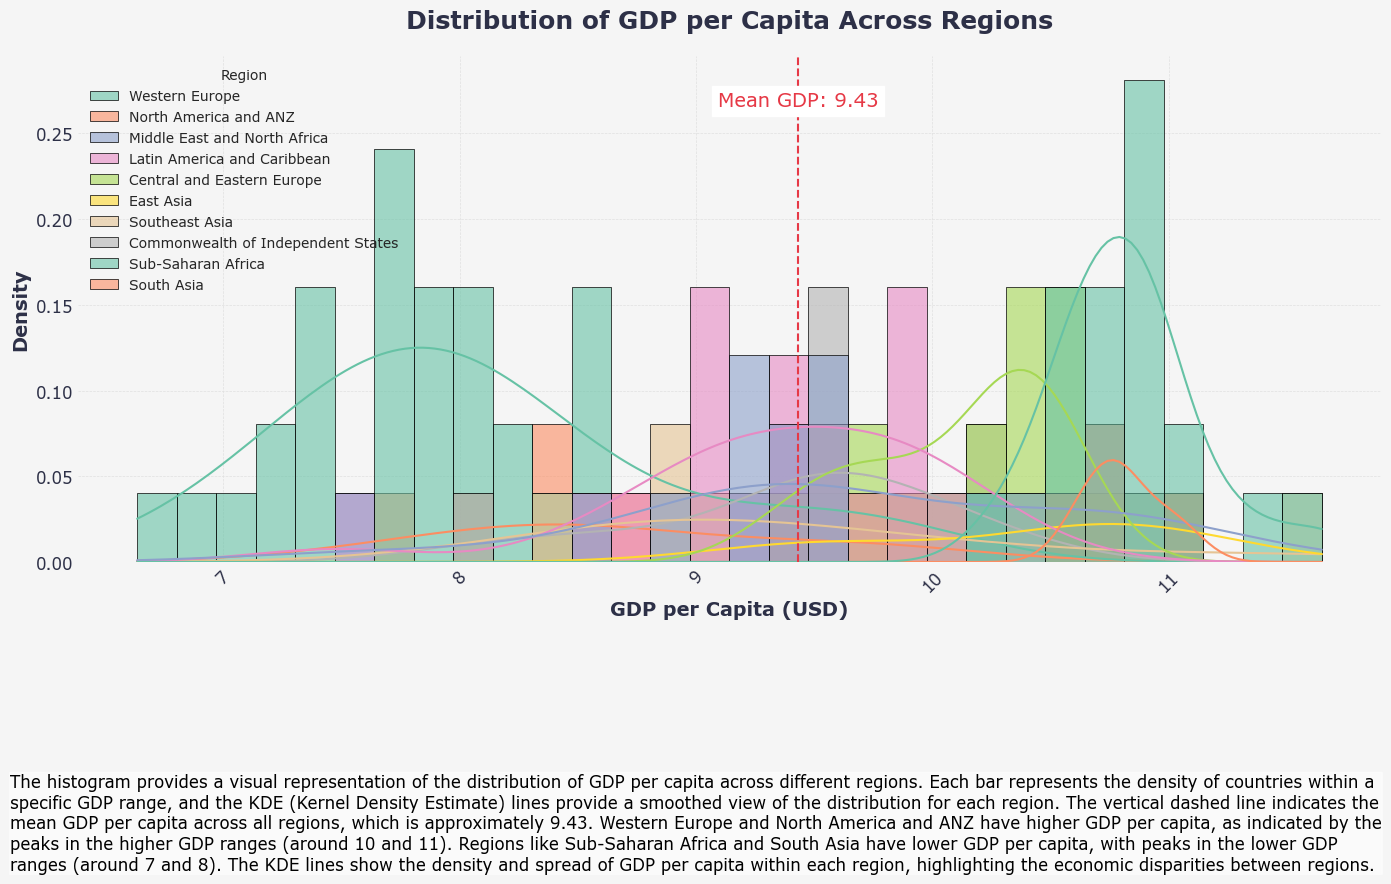

In [ ]:
histplot = sns.histplot(
    data=happy_df,
    x='GDP',
    hue='Region',
    bins=30,
    palette='Set2',  
    kde=True,
    stat='density',
    alpha=0.6,
    edgecolor='black',
    linewidth=0.5
)
mean_gdp = happy_df['GDP'].mean()

plt.axvline(mean_gdp, color=accent_color, linestyle='--', linewidth=1.5)

# Add text label on top of the line
plt.text(mean_gdp, plt.gca().get_ylim()[1] * 0.9, f'Mean GDP: {mean_gdp:.2f}', color=accent_color, fontsize=label_font_size, ha='center', backgroundcolor='white')

set_plot_titles('Distribution of GDP per Capita Across Regions', 'GDP per Capita (USD)', 'Density')

interpretation_text = (
    "The histogram provides a visual representation of the distribution of GDP per capita across different regions. "
    "Each bar represents the density of countries within a specific GDP range, and the KDE (Kernel Density Estimate) lines provide a smoothed view of the distribution for each region. "
    "The vertical dashed line indicates the mean GDP per capita across all regions, which is approximately 9.43. "
    "Western Europe and North America and ANZ have higher GDP per capita, as indicated by the peaks in the higher GDP ranges (around 10 and 11). "
    "Regions like Sub-Saharan Africa and South Asia have lower GDP per capita, with peaks in the lower GDP ranges (around 7 and 8). "
    "The KDE lines show the density and spread of GDP per capita within each region, highlighting the economic disparities between regions."
)

add_interpretation(interpretation_text)

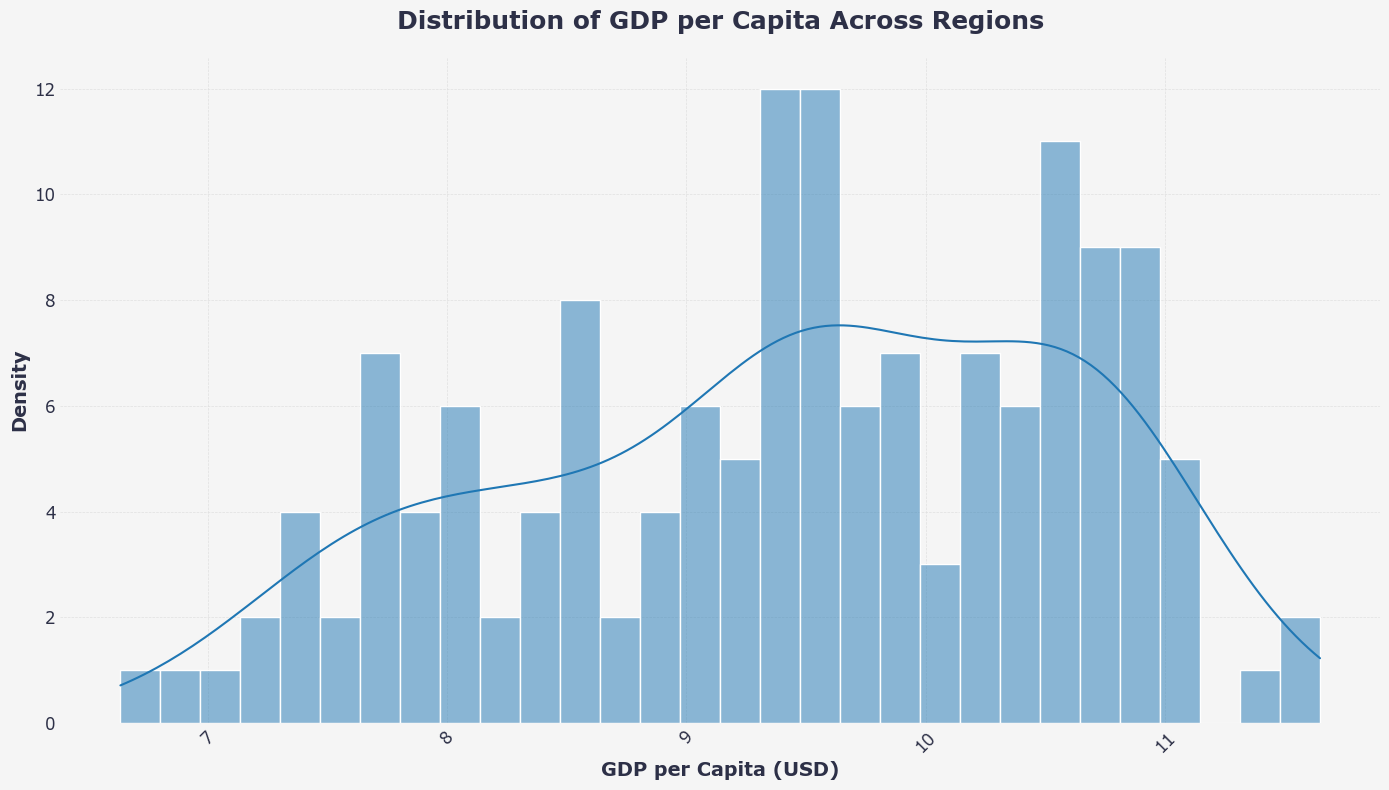

In [ ]:
histplot = sns.histplot(
    data=happy_df,
    x='GDP',
    bins=30,
    kde=True
)

set_plot_titles('Distribution of GDP per Capita Across Regions', 'GDP per Capita (USD)', 'Density')

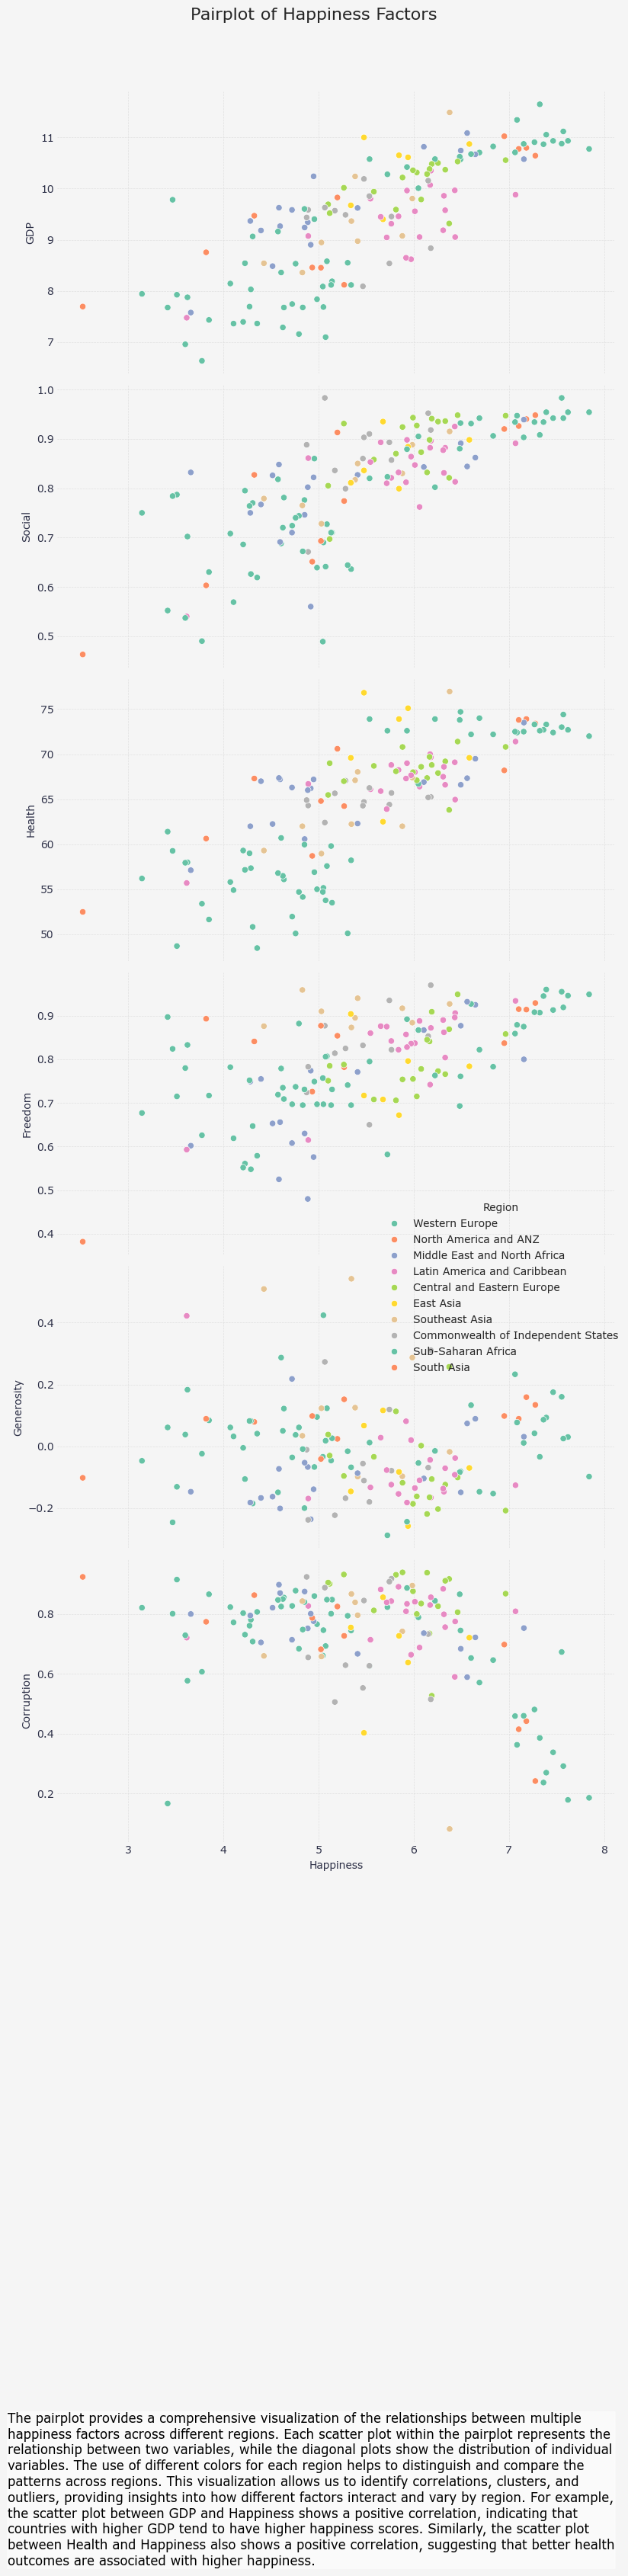

In [ ]:

selected_columns = ['Happiness', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity','Region']

pairplot = sns.pairplot(
    happy_df, 
    x_vars = ['Happiness'],
    y_vars = ['GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption'],
    kind='scatter',
    height=5,
    hue='Region',  # Color by region
    palette='Set2',  # Use a different color palette
   
)

pairplot.fig.suptitle('Pairplot of Happiness Factors', y=1.02, fontsize=16)
plt.tight_layout()

interpretation_text = (
    "The pairplot provides a comprehensive visualization of the relationships between multiple happiness factors across different regions. "
    "Each scatter plot within the pairplot represents the relationship between two variables, while the diagonal plots show the distribution of individual variables. "
    "The use of different colors for each region helps to distinguish and compare the patterns across regions. "
    "This visualization allows us to identify correlations, clusters, and outliers, providing insights into how different factors interact and vary by region. "
    "For example, the scatter plot between GDP and Happiness shows a positive correlation, indicating that countries with higher GDP tend to have higher happiness scores. "
    "Similarly, the scatter plot between Health and Happiness also shows a positive correlation, suggesting that better health outcomes are associated with higher happiness. "
    
)

add_interpretation(interpretation_text)
plt.show()

Check for outliers in our dataset

In [ ]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

happiness_outliers = find_outliers(happy_df, 'Happiness')
print("\nOutliers in Happiness Scores:")
print(happiness_outliers[['Country', 'Happiness', 'Region']])


Outliers in Happiness Scores:
         Country  Happiness      Region
148  Afghanistan      2.523  South Asia


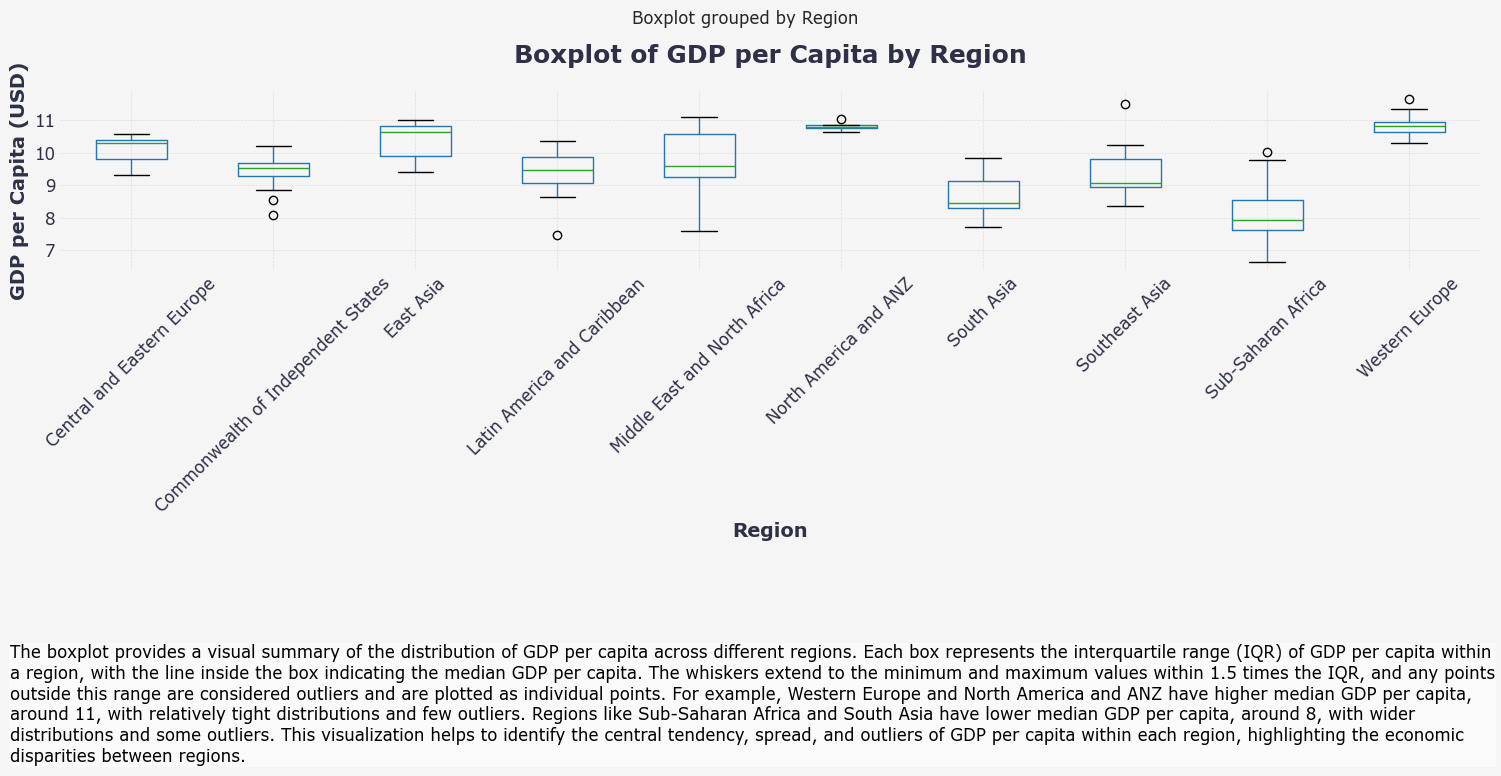

In [ ]:
# to identify the outliers
happy_df.boxplot(
    column='GDP', 
    by='Region', 
    figsize=(15, 7)
    )

set_plot_titles('Boxplot of GDP per Capita by Region', 'Region', 'GDP per Capita (USD)')
interpretation_text = (
    "The boxplot provides a visual summary of the distribution of GDP per capita across different regions. "
    "Each box represents the interquartile range (IQR) of GDP per capita within a region, with the line inside the box indicating the median GDP per capita. "
    "The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any points outside this range are considered outliers and are plotted as individual points. "
    "For example, Western Europe and North America and ANZ have higher median GDP per capita, around 11, with relatively tight distributions and few outliers. "
    "Regions like Sub-Saharan Africa and South Asia have lower median GDP per capita, around 8, with wider distributions and some outliers. "
    "This visualization helps to identify the central tendency, spread, and outliers of GDP per capita within each region, highlighting the economic disparities between regions."
)

add_interpretation(interpretation_text)

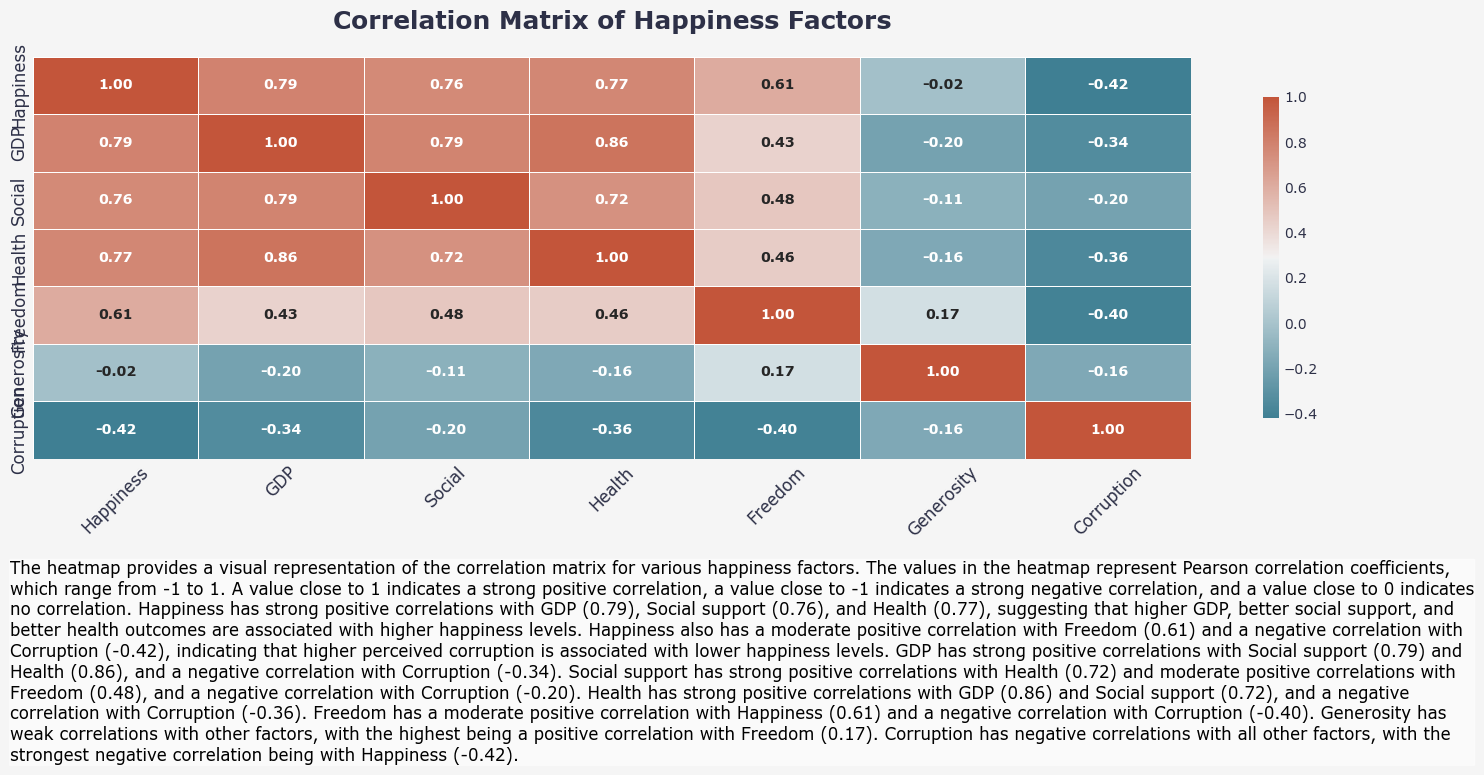

In [ ]:
# Analyze the correlation between numerical columns
correlation_cols = ['Happiness', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']
correlation_matrix = happy_df[correlation_cols].corr(method='pearson')
plt.figure(figsize=(15, 7))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap=cmap, 
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10, 'weight': 'bold'}
    )
set_plot_titles('Correlation Matrix of Happiness Factors')
interpretation_text = (
    "The heatmap provides a visual representation of the correlation matrix for various happiness factors. "
    "The values in the heatmap represent Pearson correlation coefficients, which range from -1 to 1. "
    "A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation. "
    "Happiness has strong positive correlations with GDP (0.79), Social support (0.76), and Health (0.77), suggesting that higher GDP, better social support, and better health outcomes are associated with higher happiness levels. "
    "Happiness also has a moderate positive correlation with Freedom (0.61) and a negative correlation with Corruption (-0.42), indicating that higher perceived corruption is associated with lower happiness levels. "
    "GDP has strong positive correlations with Social support (0.79) and Health (0.86), and a negative correlation with Corruption (-0.34). "
    "Social support has strong positive correlations with Health (0.72) and moderate positive correlations with Freedom (0.48), and a negative correlation with Corruption (-0.20). "
    "Health has strong positive correlations with GDP (0.86) and Social support (0.72), and a negative correlation with Corruption (-0.36). "
    "Freedom has a moderate positive correlation with Happiness (0.61) and a negative correlation with Corruption (-0.40). "
    "Generosity has weak correlations with other factors, with the highest being a positive correlation with Freedom (0.17). "
    "Corruption has negative correlations with all other factors, with the strongest negative correlation being with Happiness (-0.42)."
)

add_interpretation(interpretation_text)

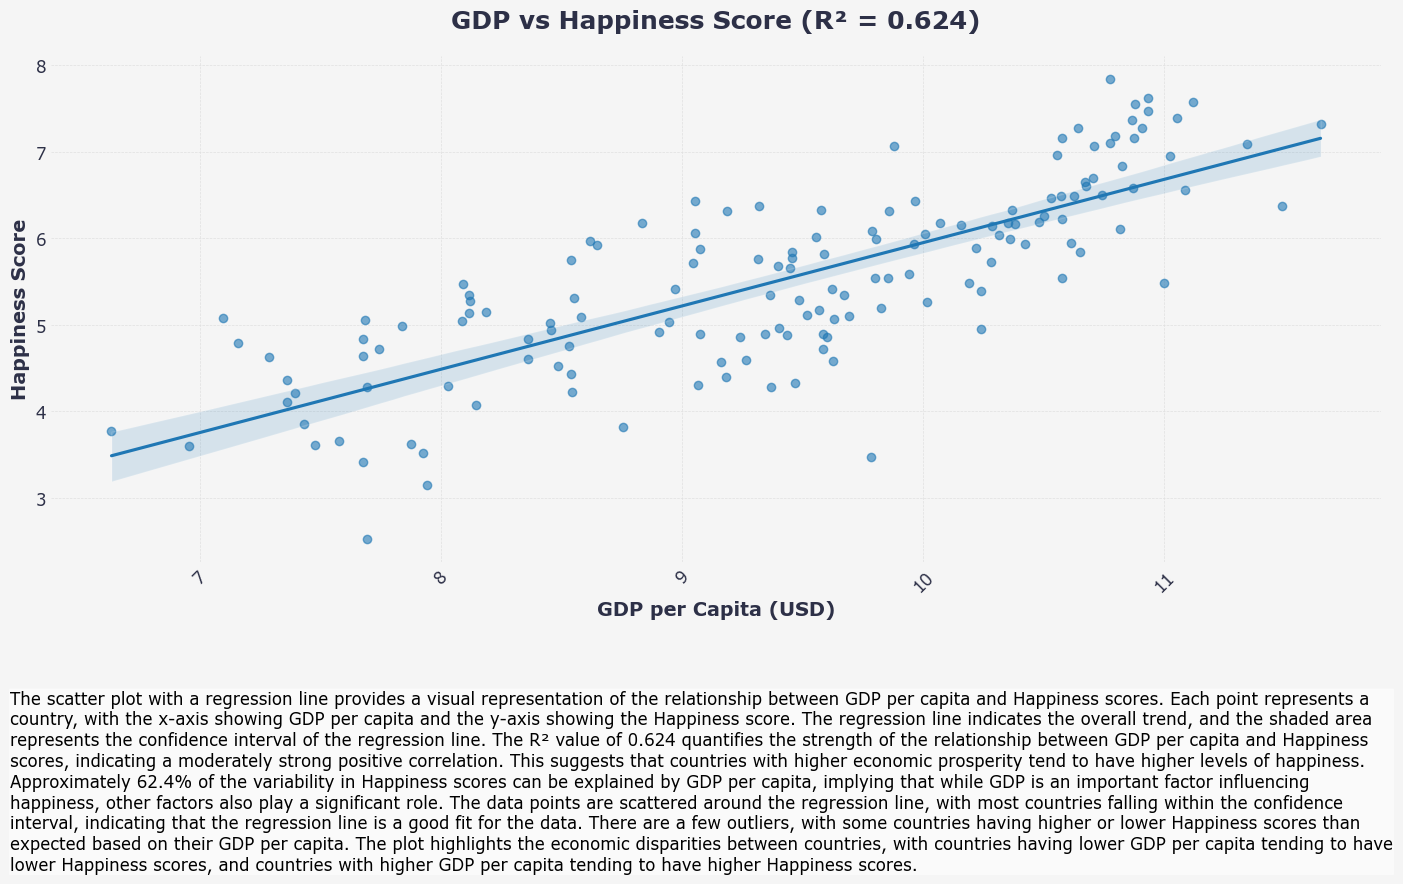

In [ ]:
from scipy import stats

# Simple linear regression between GDP and Happiness
slope, intercept, r_value, p_value, std_err = stats.linregress(happy_df['GDP'], happy_df['Happiness'])

sns.regplot(
    data=happy_df, 
    x='GDP', 
    y='Happiness',
    scatter_kws={'alpha': 0.6},
    )
set_plot_titles(f'GDP vs Happiness Score (R² = {r_value**2:.3f})', 'GDP per Capita (USD)', 'Happiness Score')

interpretation_text = (
    "The scatter plot with a regression line provides a visual representation of the relationship between GDP per capita and Happiness scores. "
    "Each point represents a country, with the x-axis showing GDP per capita and the y-axis showing the Happiness score. "
    "The regression line indicates the overall trend, and the shaded area represents the confidence interval of the regression line. "
    "The R² value of 0.624 quantifies the strength of the relationship between GDP per capita and Happiness scores, indicating a moderately strong positive correlation. "
    "This suggests that countries with higher economic prosperity tend to have higher levels of happiness. "
    "Approximately 62.4% of the variability in Happiness scores can be explained by GDP per capita, implying that while GDP is an important factor influencing happiness, other factors also play a significant role. "
    "The data points are scattered around the regression line, with most countries falling within the confidence interval, indicating that the regression line is a good fit for the data. "
    "There are a few outliers, with some countries having higher or lower Happiness scores than expected based on their GDP per capita. "
    "The plot highlights the economic disparities between countries, with countries having lower GDP per capita tending to have lower Happiness scores, and countries with higher GDP per capita tending to have higher Happiness scores."
)

add_interpretation(interpretation_text)

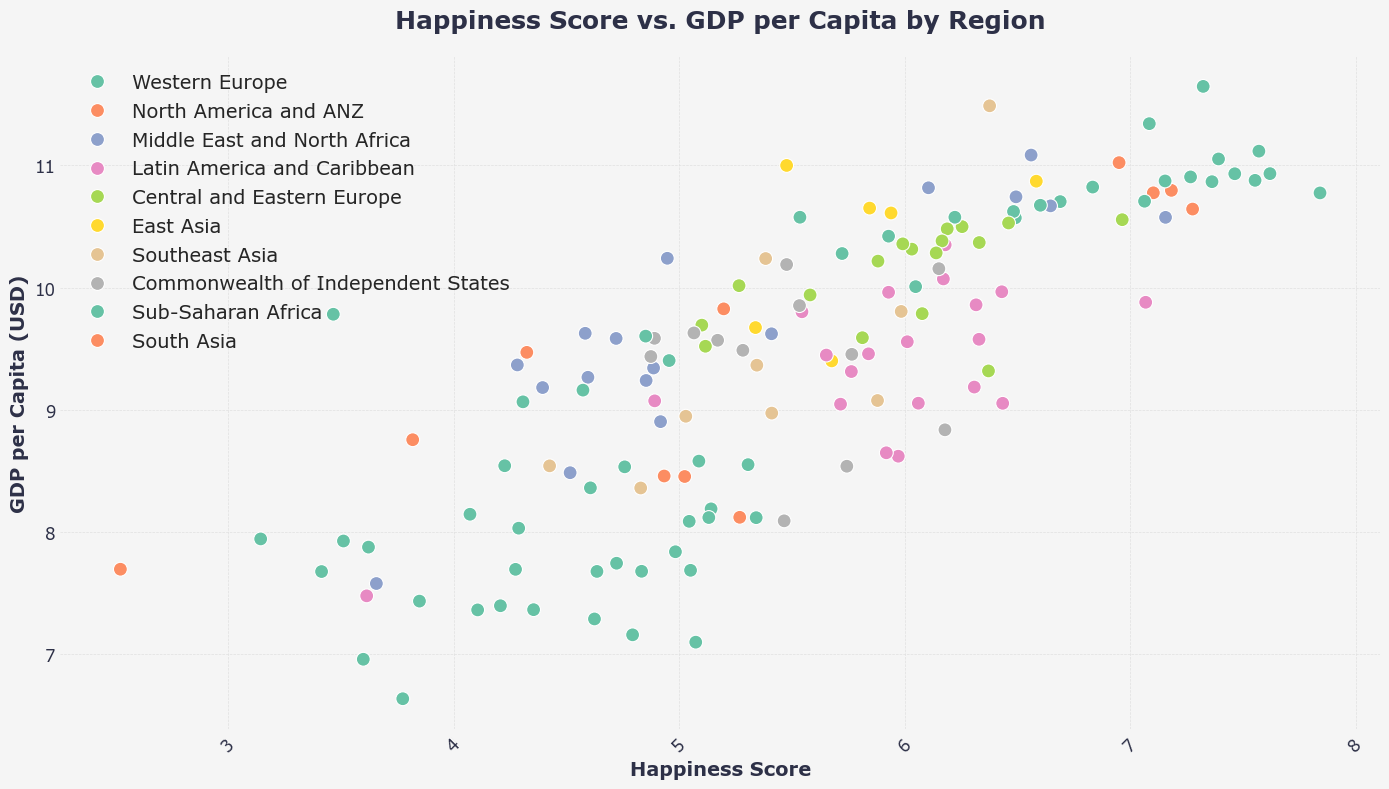

In [ ]:

sns.scatterplot(
    x=happy_df['Happiness'], 
    y=happy_df['GDP'], 
    hue=happy_df['Region'], hue_order=happy_df['Region'].unique(), palette='Set2', 
    s=100, 
    )

set_plot_titles('Happiness Score vs. GDP per Capita by Region', 'Happiness Score', 'GDP per Capita (USD)')

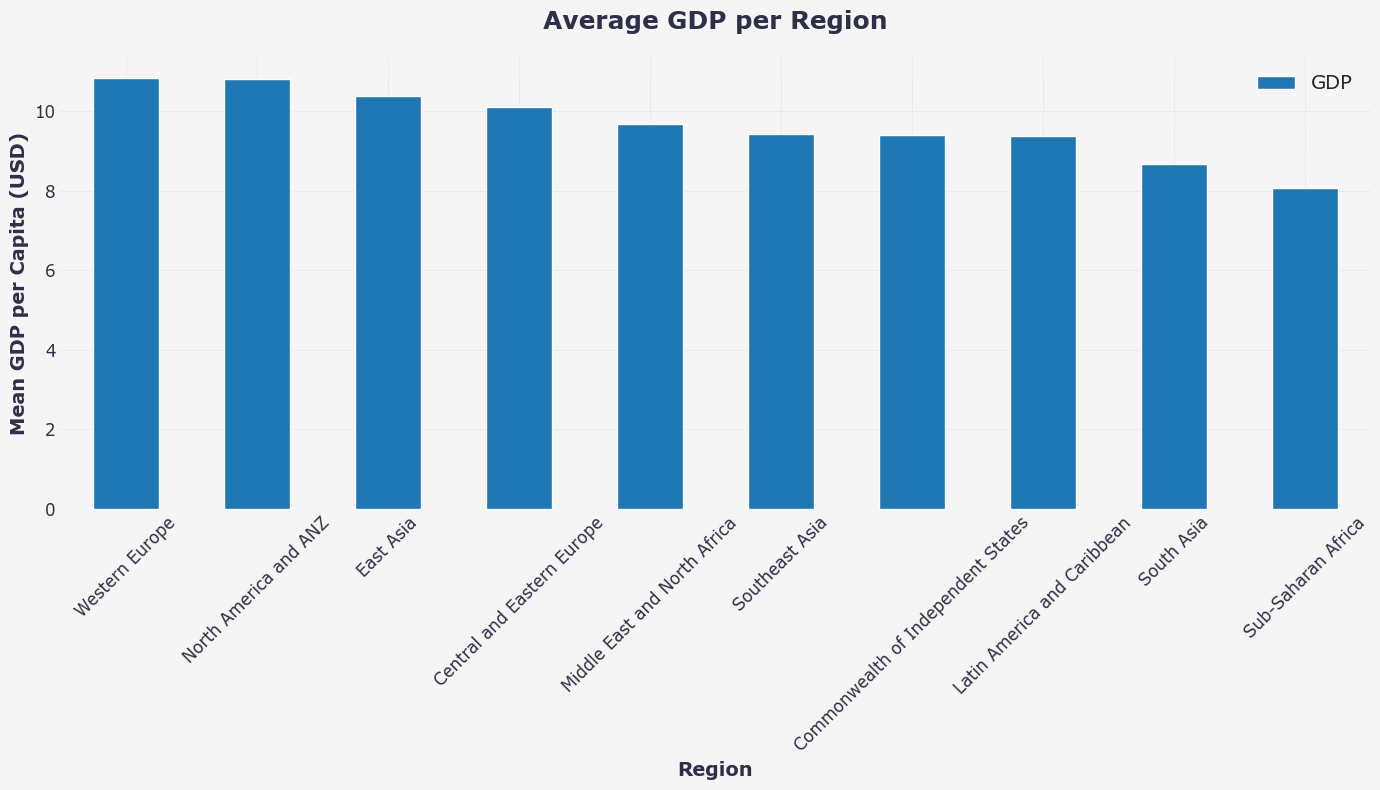

In [ ]:
gdp_region = happy_df.groupby('Region')['GDP'].mean().sort_values(ascending=False)
gdp_region.plot(kind='bar')

set_plot_titles('Average GDP per Region', 'Region', 'Mean GDP per Capita (USD)')

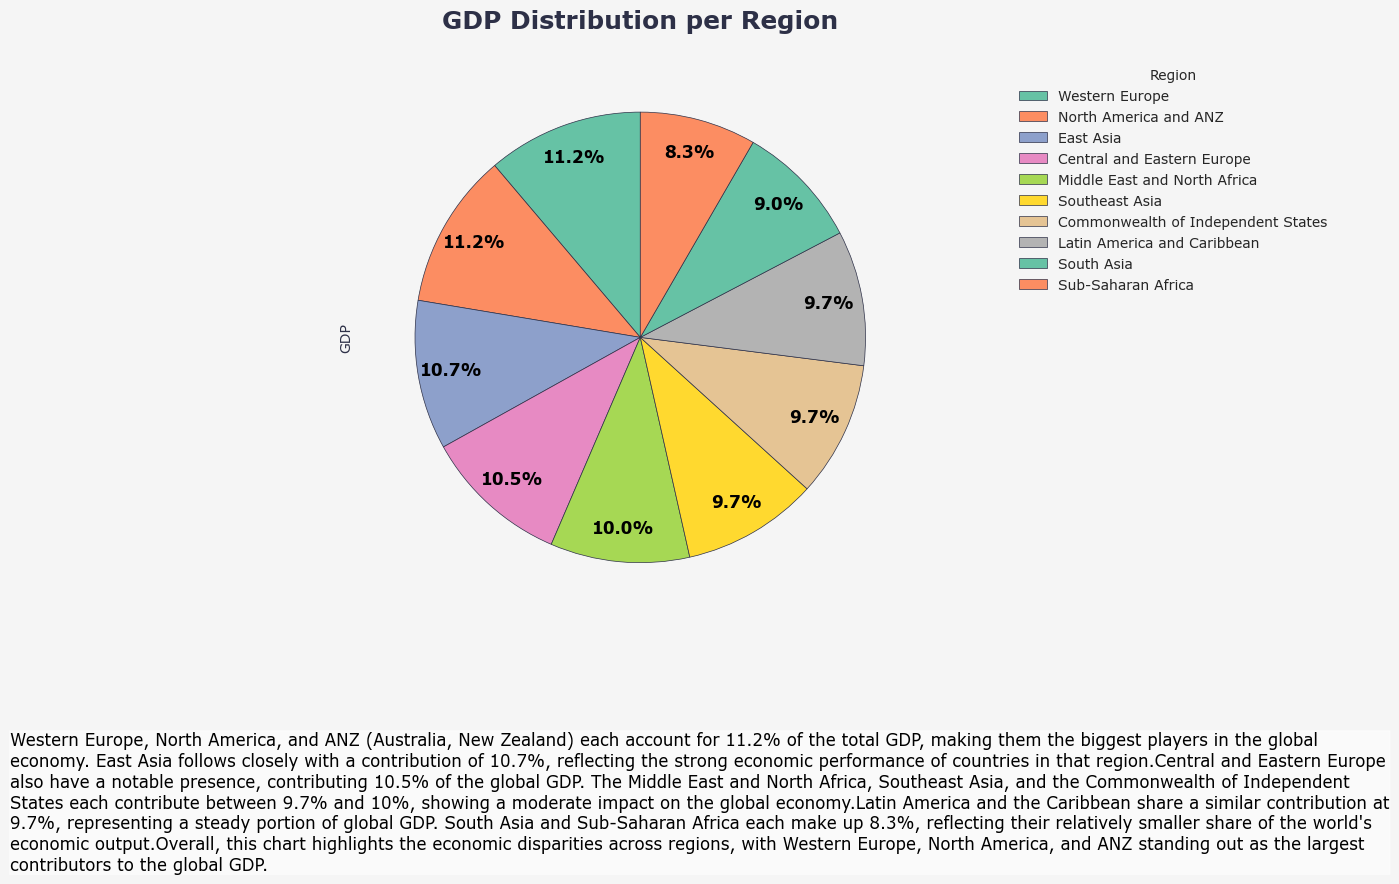

In [ ]:
#gdp_region.plot.pie(autopct='%1.1f%%')
gdp_region.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    textprops={'fontsize': tick_font_size, 'color': 'black', 'weight': 'bold'},  # 12
    wedgeprops={'edgecolor': text_color, 'linewidth': 0.5},  # '#2D3047'
    startangle=90,
    pctdistance=0.85,
    labeldistance=None
)

set_plot_titles('GDP Distribution per Region')
plt.legend(
    gdp_region.index,
    title='Region', 
    bbox_to_anchor=(1.15, 1),
)

ax.axhline(y=0.9, color='black', linewidth=1)



# Add the text below the horizontal line
text = ("Western Europe, North America, and ANZ (Australia, New Zealand) each account for 11.2% of the total GDP, making them the biggest players in the global economy. East Asia follows closely with a contribution of 10.7%, reflecting the strong economic performance of countries in that region."

"Central and Eastern Europe also have a notable presence, contributing 10.5% of the global GDP. The Middle East and North Africa, Southeast Asia, and the Commonwealth of Independent States each contribute between 9.7% and 10%, showing a moderate impact on the global economy."

"Latin America and the Caribbean share a similar contribution at 9.7%, representing a steady portion of global GDP. South Asia and Sub-Saharan Africa each make up 8.3%, reflecting their relatively smaller share of the world's economic output."

"Overall, this chart highlights the economic disparities across regions, with Western Europe, North America, and ANZ standing out as the largest contributors to the global GDP."
)

add_interpretation(text)

In [ ]:
# total number of countries per region
total_countries = happy_df['Region'].value_counts()
total_countries

Region
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: count, dtype: int64

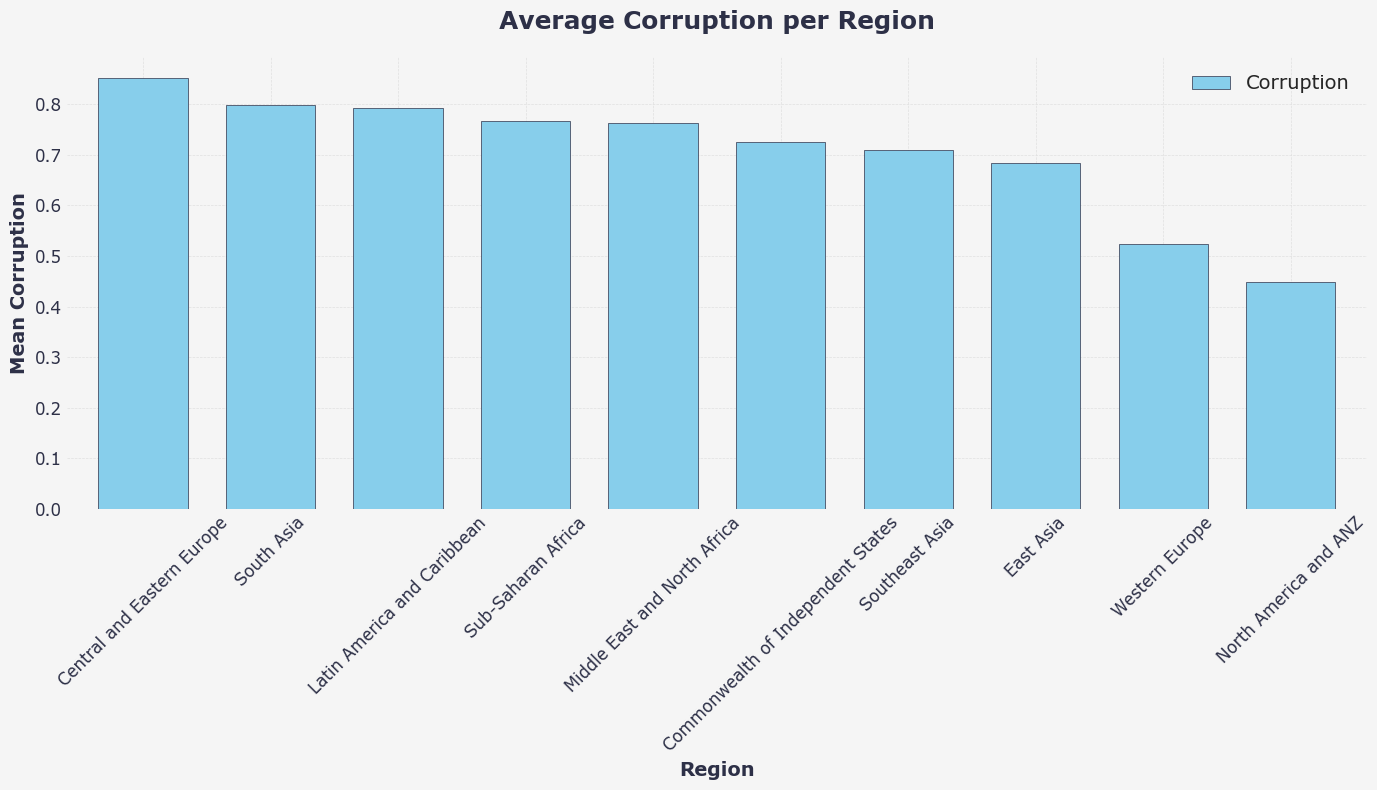

In [ ]:
# corruption per region

corruption = happy_df.groupby('Region')['Corruption'].mean().sort_values(ascending=False)

corruption.plot(
    kind='bar',
    color='skyblue',  
    edgecolor=text_color,  
    linewidth=0.5,
    width=0.7  
)

set_plot_titles('Average Corruption per Region', 'Region', 'Mean Corruption')

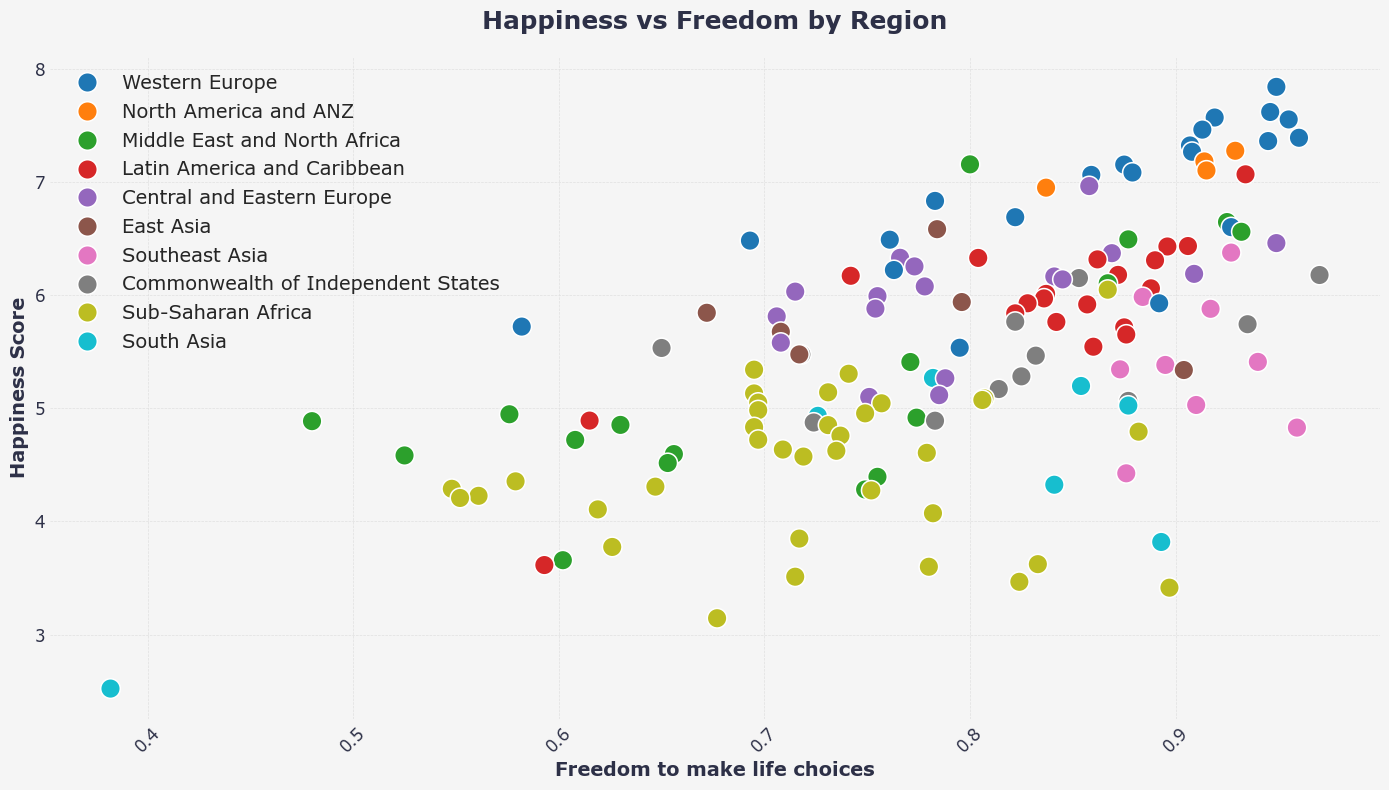

In [ ]:
sns.scatterplot(x = happy_df['Freedom'], y = happy_df['Happiness'], s = 200, hue = happy_df['Region'])

set_plot_titles('Happiness vs Freedom by Region', 'Freedom to make life choices', 'Happiness Score')

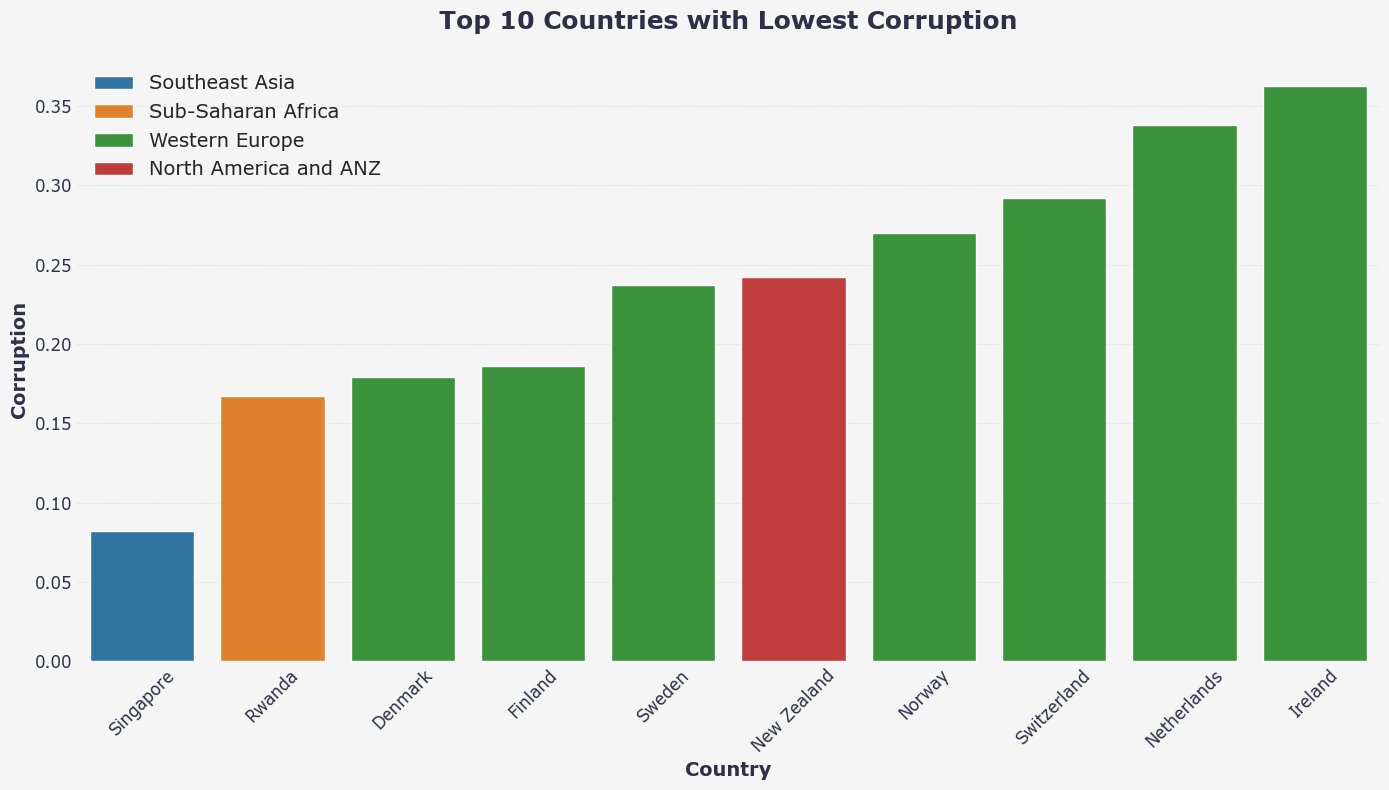

In [ ]:
country = happy_df.sort_values(by='Corruption', ascending=True).head(10)
sns.barplot(x=country['Country'], y=country['Corruption'], hue=country['Region'])

set_plot_titles('Top 10 Countries with Lowest Corruption', 'Country', 'Corruption')

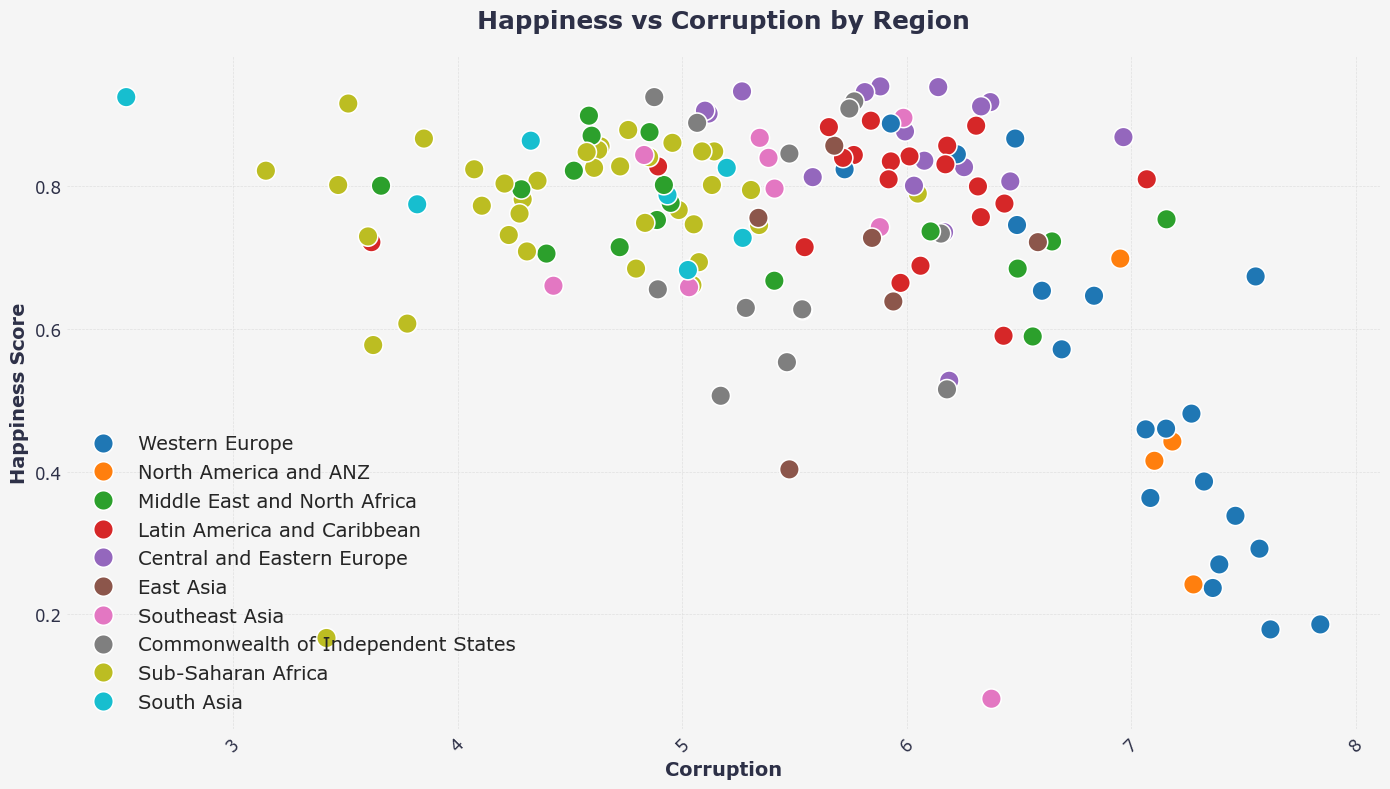

In [ ]:
# corruption vs happiness
sns.scatterplot(x=happy_df['Happiness'], y=happy_df['Corruption'], s=200, hue=happy_df['Region'])

set_plot_titles('Happiness vs Corruption by Region', 'Corruption', 'Happiness Score')

In [ ]:
def layoutSubtitle(ax, title):
    ax.set_title(title, fontsize=title_font_size, fontweight='bold', pad=20)
    ax.set_xlabel('Countries', fontsize=label_font_size, fontweight='bold')
    ax.set_ylabel('Happiness Score', fontsize=label_font_size, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=tick_font_size)
    ax.tick_params(axis='y', labelsize=tick_font_size)
    for tick in ax.get_xticklabels():
        tick.set_ha('right')
    
    # Add a subtle border to the figure
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_linewidth(0.5)
            spine.set_edgecolor(text_color)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle

# Add data labels on top of bars
def addLabelsOnTopOfBars(bars1, attribute):
    for i, bar in enumerate(bars1.patches):
        value = top_10_happy_sorted[attribute].iloc[i]
        bars1.text(
            bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 0.2, 
            f'{value:.1f}', 
            ha='center', 
            va='bottom',
            fontweight='bold',
            color=text_color,
            fontsize=10
        )


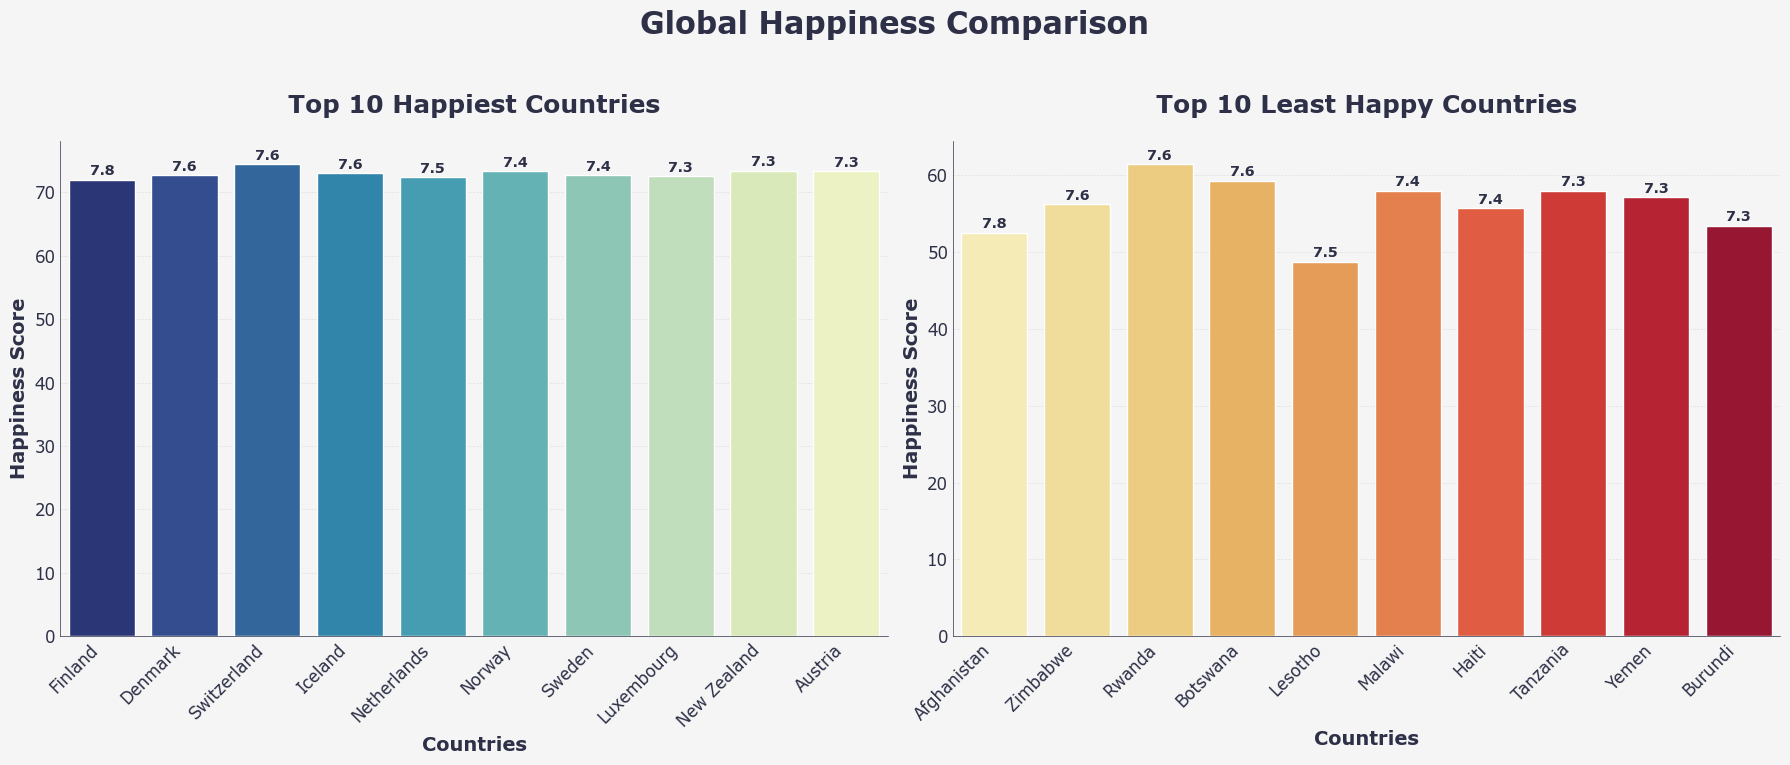

In [ ]:
top_10_happy_sorted = happy_df.sort_values('Happiness', ascending=False).head(10)
top_10_least_happy_sorted = happy_df.sort_values('Happiness', ascending=True).head(10)

# Create figure with custom background
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.patch.set_facecolor(background_color)
plt.subplots_adjust(wspace=0.2, bottom=0.15)

# Create custom colormap for happy countries
happy_colors = sns.color_palette("YlGnBu_r", n_colors=len(top_10_happy_sorted))
least_happy_colors = sns.color_palette("YlOrRd", n_colors=len(top_10_least_happy_sorted))

bars1 = sns.barplot(
    x='Country', 
    y='Health', 
    hue='Country',
    data=top_10_happy_sorted, 
    ax=axes[0],
    palette=happy_colors,
    legend=False
)
addLabelsOnTopOfBars(bars1, 'Happiness')

bars2 = sns.barplot(
    x='Country', 
    y='Health',
    hue='Country',
    data=top_10_least_happy_sorted, 
    ax=axes[1],
    palette=least_happy_colors,
    legend=False
)
addLabelsOnTopOfBars(bars2, 'Happiness')


layoutSubtitle(axes[1], 'Top 10 Least Happy Countries')
layoutSubtitle(axes[0], 'Top 10 Happiest Countries')

# Add a stylish title to the entire figure
fig.suptitle('Global Happiness Comparison', fontsize=22, fontweight='bold', color=text_color, y=0.98)



plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

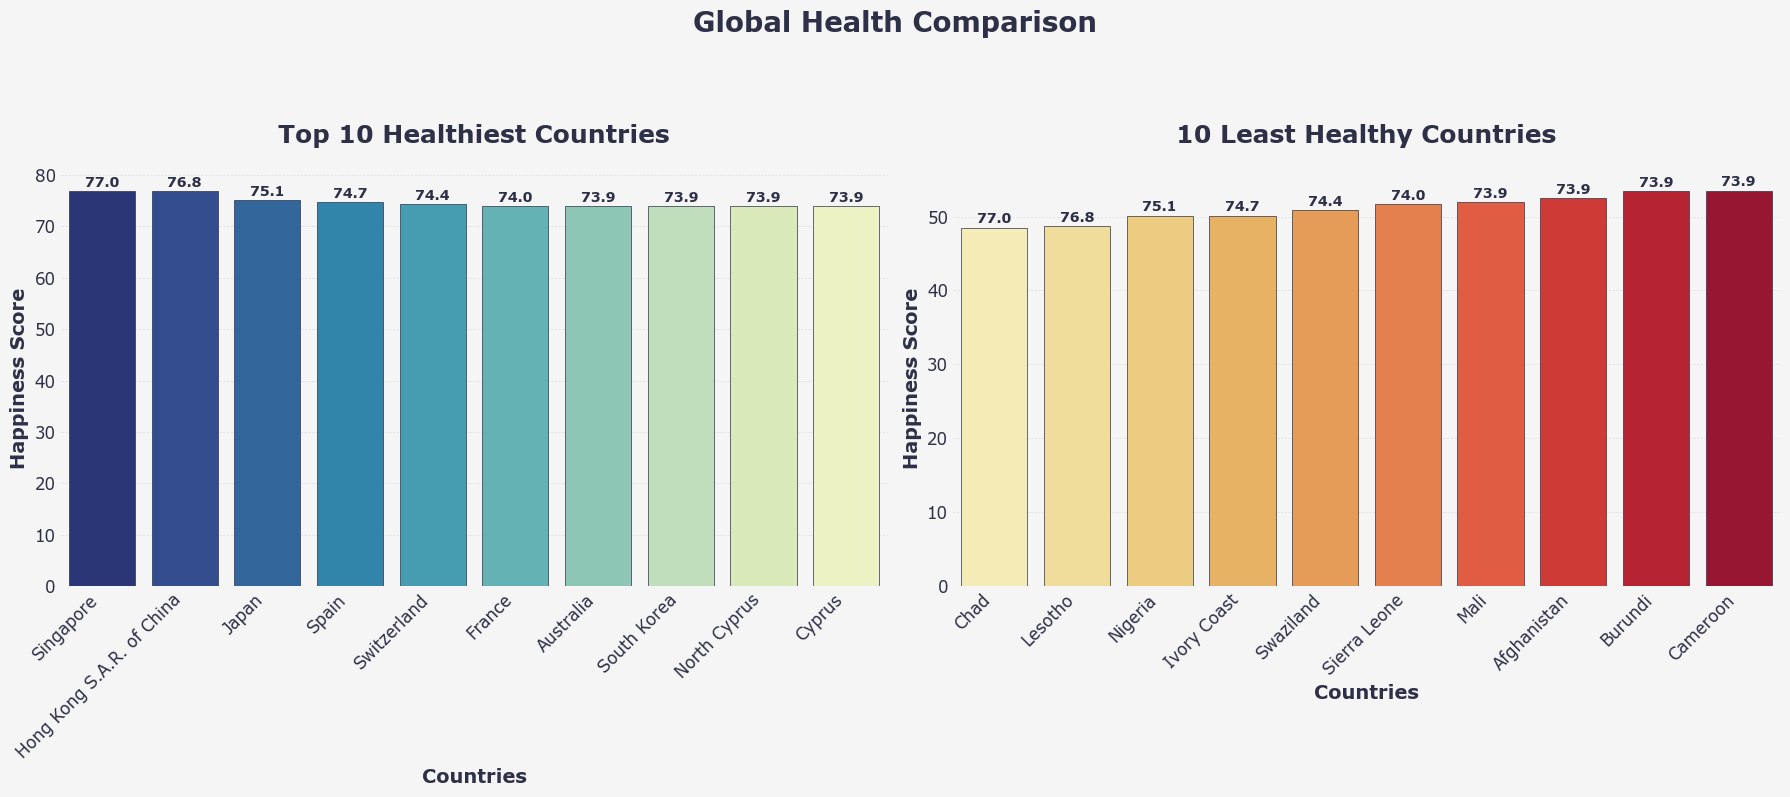

In [ ]:
top_10_happy_sorted = happy_df.sort_values('Health', ascending=False).head(10)
top_10_least_happy_sorted = happy_df.sort_values('Health', ascending=True).head(10)

# Create figure with default global figure size
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.patch.set_facecolor(background_color)
fig.set_size_inches(18, 8)
plt.subplots_adjust(wspace=0.2, bottom=0.15)


sns.barplot(
    data=top_10_happy_sorted,
    x='Country', 
    y='Health',
    hue='Country',  # Add hue parameter
    palette="YlGnBu_r",
    ax=ax1,
    edgecolor=text_color,
    linewidth=0.5,
   
    legend=False  # Hide legend
)

sns.barplot(
    data=top_10_least_happy_sorted,
    x='Country',
    y='Health',
    hue='Country',  # Add hue parameter
    palette="YlOrRd",
    ax=ax2, 
    edgecolor=text_color,
    linewidth=0.5,
  
    legend=False  # Hide legend
)

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

fig.suptitle('Global Health Comparison', 
             fontsize=title_font_size+2, 
             y=1.02, 
             fontweight='bold', 
             color=text_color,
            )

layoutSubtitle(ax1, 'Top 10 Healthiest Countries')
layoutSubtitle(ax2, '10 Least Healthy Countries')
addLabelsOnTopOfBars(ax1, 'Health')
addLabelsOnTopOfBars(ax2, 'Health')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle

plt.show()

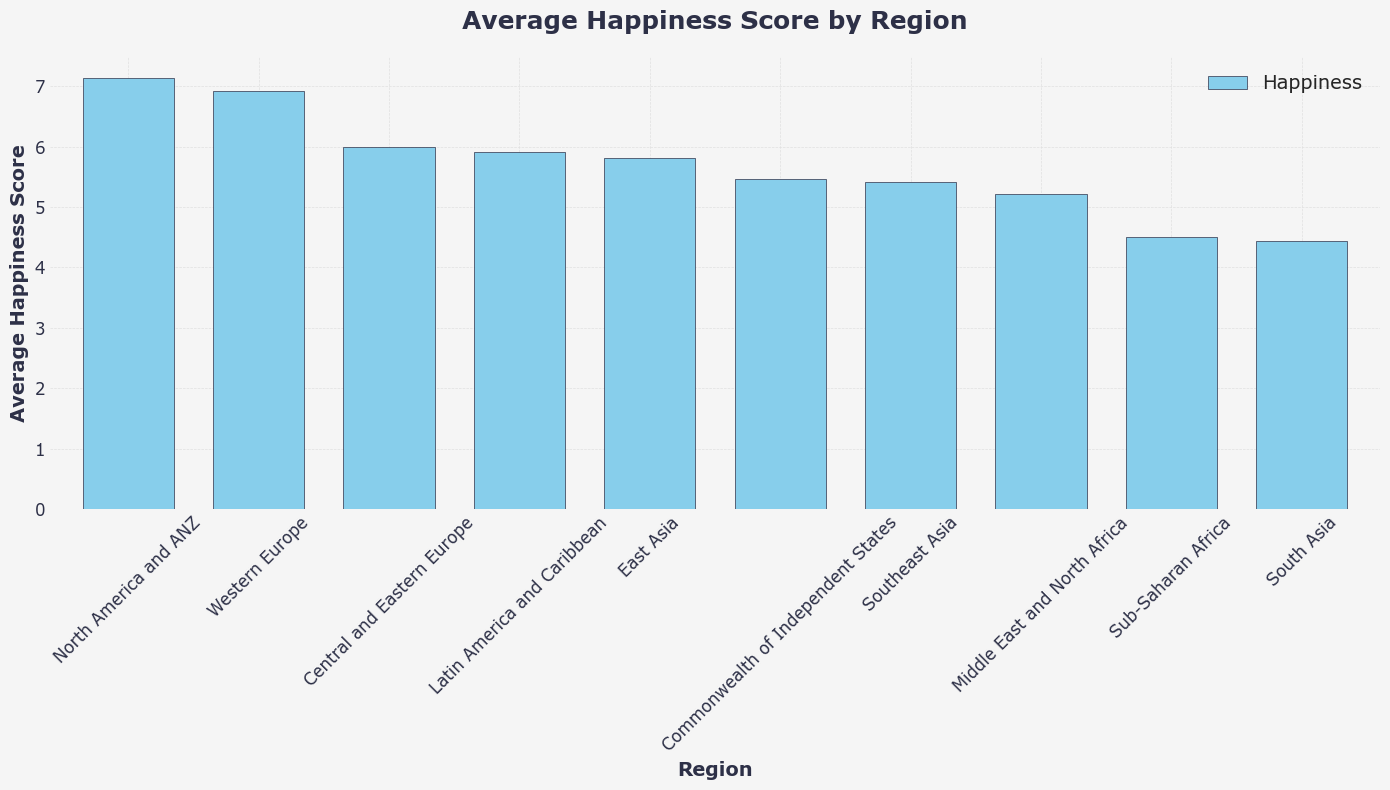

In [ ]:
# Average happiness score by region
regional_avg = happy_df.groupby('Region')['Happiness'].mean().sort_values(ascending=False)
regional_avg.plot(
    kind='bar',
    color='skyblue',  
    edgecolor=text_color,  
    linewidth=0.5,
    width=0.7  
    )

set_plot_titles('Average Happiness Score by Region', 'Region', 'Average Happiness Score')

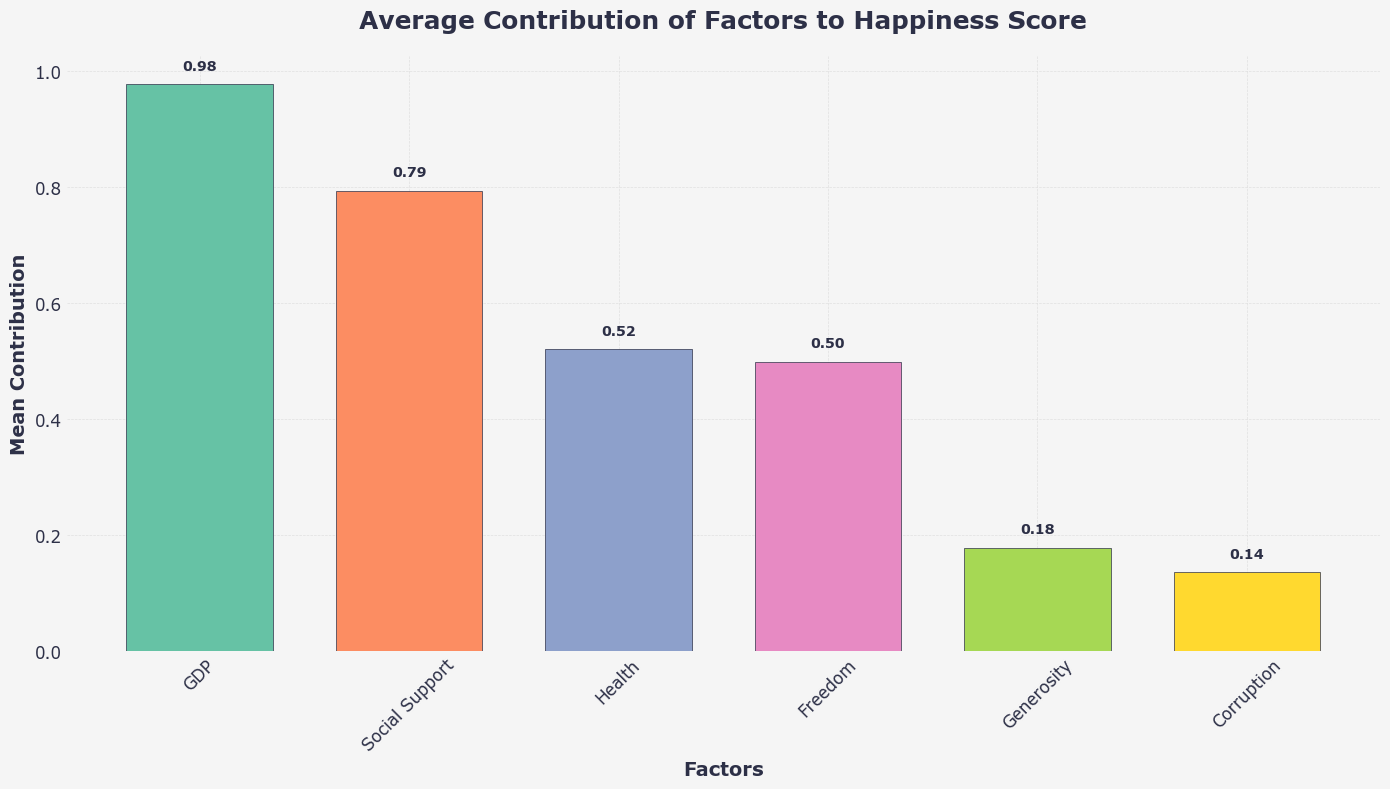

In [ ]:
# Define factors based on likely columns in happy_df
#factors = ['GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']
factors = ['Explained by: Log GDP per capita', 'Explained by: Social support',
           'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']
short_labels = ['GDP', 'Social Support', 'Health', 'Freedom', 'Generosity', 'Corruption']  # Descriptive x-tick labels

mean_contributions = data[factors].mean()
bars = plt.bar(
    short_labels, 
    mean_contributions, 
    color=sns.color_palette('Set2', n_colors=len(factors)),  
    edgecolor=text_color,  # '#2D3047' for outlines
    linewidth=0.5,
    width=0.7  # Narrower bars
)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.02,  
        f'{height:.2f}', 
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        color=text_color,  
        fontsize=10
    )

set_plot_titles('Average Contribution of Factors to Happiness Score', 'Factors', 'Mean Contribution')

In [ ]:
regional_analysis = happy_df.groupby('Region').agg({
    'Happiness': ['mean', 'std', 'count'], 
    'GDP': 'mean',                          
    'Social': 'mean',                       
    'Health': 'mean'                        
}).round(3) 

print("Regional Analysis - Happiness Metrics by Region:")
print(regional_analysis)


Regional Analysis - Happiness Metrics by Region:
                                   Happiness                  GDP Social  \
                                        mean    std count    mean   mean   
Region                                                                     
Central and Eastern Europe             5.985  0.493    17  10.109  0.887   
Commonwealth of Independent States     5.467  0.438    12   9.402  0.872   
East Asia                              5.810  0.440     6  10.368  0.860   
Latin America and Caribbean            5.908  0.693    20   9.370  0.839   
Middle East and North Africa           5.220  0.999    17   9.666  0.798   
North America and ANZ                  7.128  0.138     4  10.810  0.934   
South Asia                             4.442  0.993     7   8.683  0.703   
Southeast Asia                         5.408  0.606     9   9.421  0.820   
Sub-Saharan Africa                     4.494  0.655    36   8.075  0.697   
Western Europe                         

The table shows happiness and related metrics for world regions:

- **Happiness**:  
  - **Mean**: Average happiness score (0-10).  
  - **Std**: How much scores vary (higher = more variation).  
  - **Count**: Number of countries in each region.  
- **GDP**: Average GDP per capita (log scale).  
- **Social**: Average social support (0-1, higher = more support).  
- **Health**: Healthy life expectancy (years).  

**Key insights:**  
- **Happiest regions**:  
  - **North America and ANZ** (mean 7.13, low variation).  
  - **Western Europe** (mean 6.92).  
- **Least happy regions**:  
  - **South Asia** (mean 4.44).  
  - **Sub-Saharan Africa** (mean 4.49, most countries).  
- **Wealth**: North America, ANZ, and Western Europe have the highest GDP.  
- **Support**: Strongest in North America and ANZ, weakest in Sub-Saharan Africa.  
- **Health**: Longest life expectancy in Western Europe (73 years), shortest in Sub-Saharan Africa (56 years).  

Happier regions generally have higher GDP, better social support, and longer life expectancy.

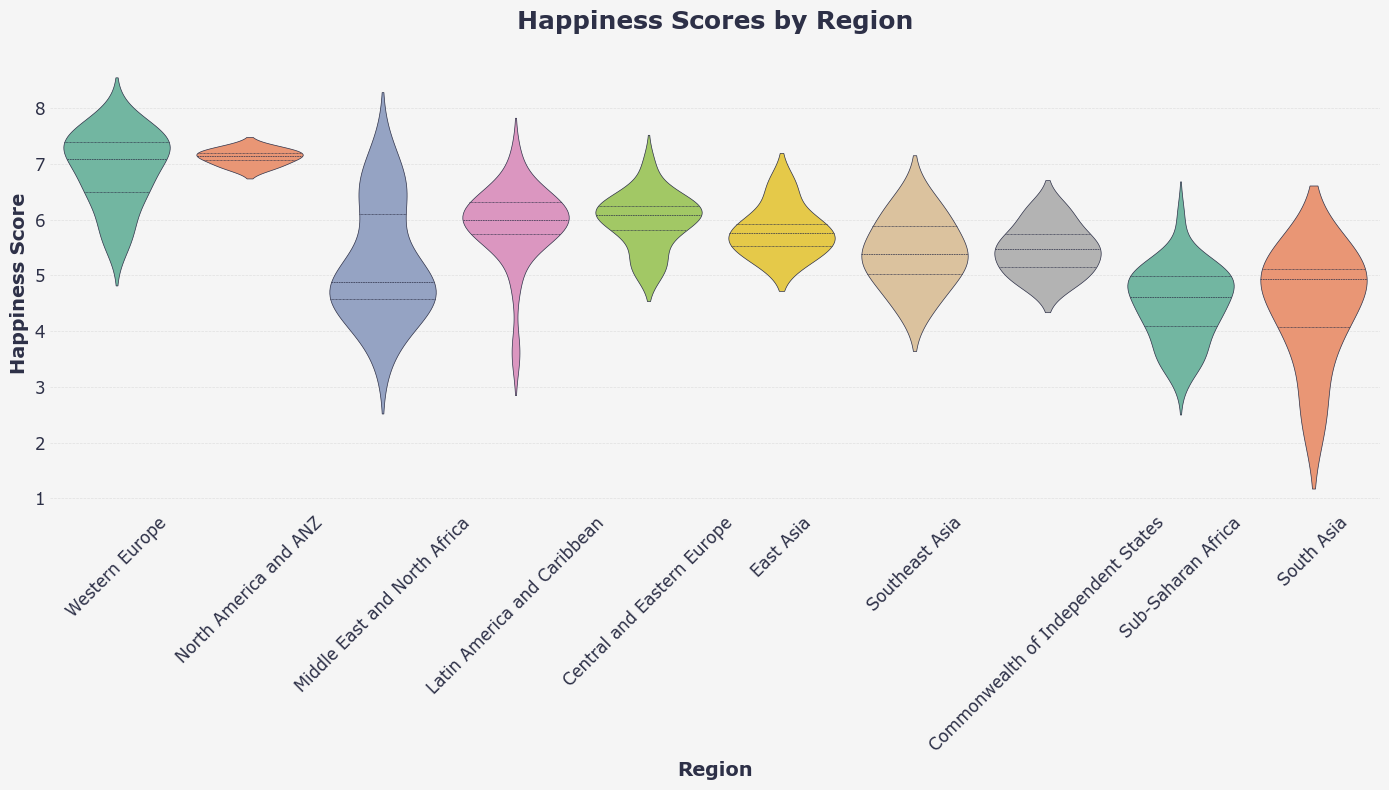

In [ ]:
# Create a violin plot to show happiness distribution
# A violin plot shows how happiness scores spread out in each region
sns.violinplot(
    x='Region',              
    y='Happiness',           
    hue='Region',            
    data=happy_df,           
    palette='Set2',         
    inner='quartile',        # Show lines for 25%, 50%, 75% of data inside each violin
    linewidth=0.5,           
    edgecolor='#2D3047',     
    legend=False             
)

set_plot_titles('Happiness Scores by Region', 'Region', 'Happiness Score')

The violin plot shows how happiness scores are spread across regions:  

- **Narrow violins** (North America and ANZ, East Asia): Scores are closely clustered, meaning less variation.  
- **Wider violins** (Middle East, South Asia): Big gaps in happiness between countries.  
- **Low and wide violins** (Sub-Saharan Africa): Low scores with moderate variation.  

---

###  **Overall Patterns**

- **Happiest regions**: North America, ANZ, and Western Europe — strong economies, high support, long life expectancy.  
- **Least happy regions**: South Asia and Sub-Saharan Africa — lower wealth, support, and health.  
- **Middle ground**: Latin America, Central and Eastern Europe, and East Asia — moderate happiness with some variation.  
- **Key drivers of happiness**: Wealth, community support, and health.  

In short: richer, healthier regions with strong community ties are generally happier. Let me know if you want to dive deeper into any part!

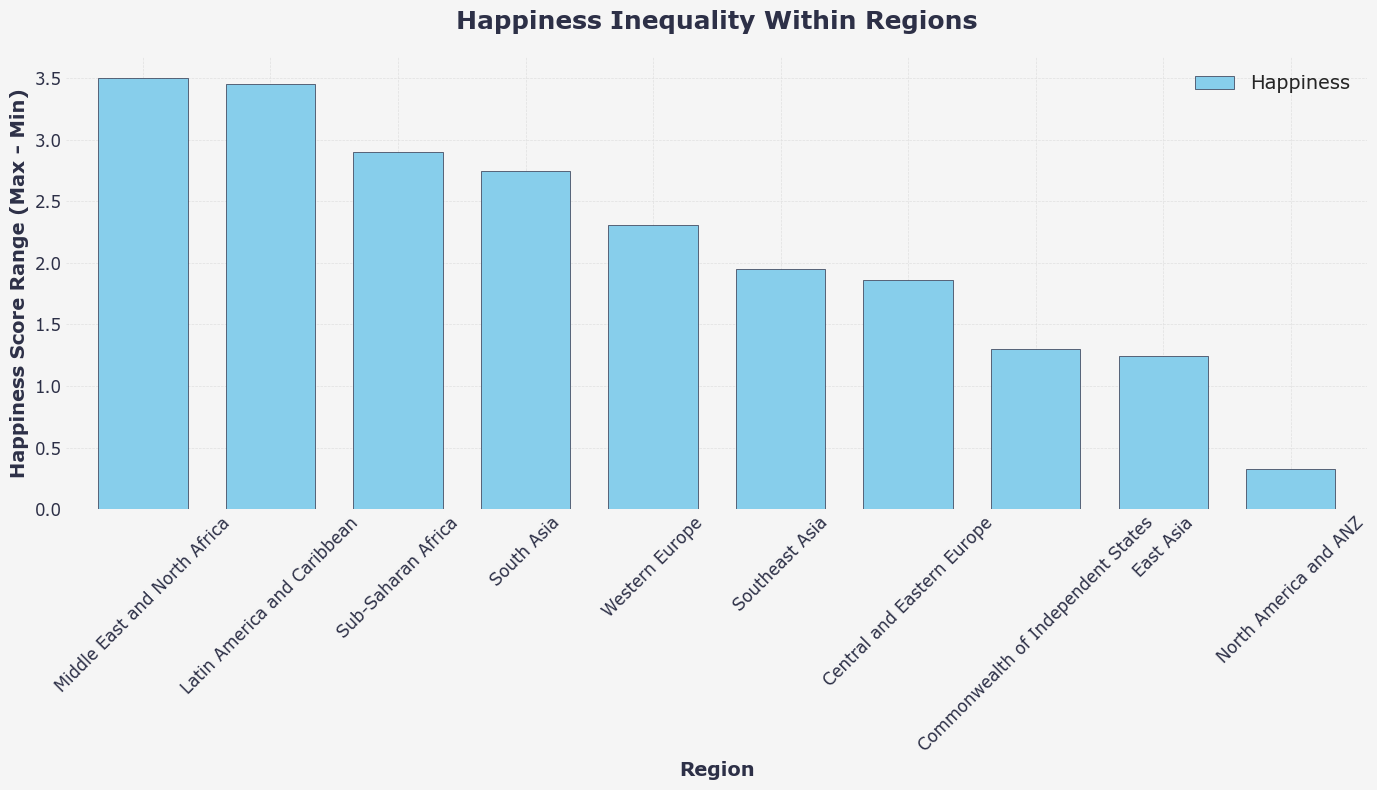

In [ ]:
# Analyze inequality in happiness within regions
happiness_inequality = happy_df.groupby('Region').agg({
    'Happiness': lambda x: x.max() - x.min()
}).sort_values('Happiness', ascending=False)

happiness_inequality.plot(
    kind='bar',
    color='skyblue',
    edgecolor=text_color,
    linewidth=0.5,
    width=0.7
    )

set_plot_titles('Happiness Inequality Within Regions', 'Region', 'Happiness Score Range (Max - Min)')

### Happiness Inequality by Region

- High inequality: Middle East & North Africa, Latin America & Caribbean (~3.5 points)  
- Moderate: Sub-Saharan Africa, South Asia (2.5–3 points)  
- Low: Western Europe, Southeast Asia, Central & Eastern Europe, CIS (~2 points)  
- Lowest: East Asia (1.2), North America & ANZ (0.3)  

Happiness gaps are wider in regions with greater economic and social divides.

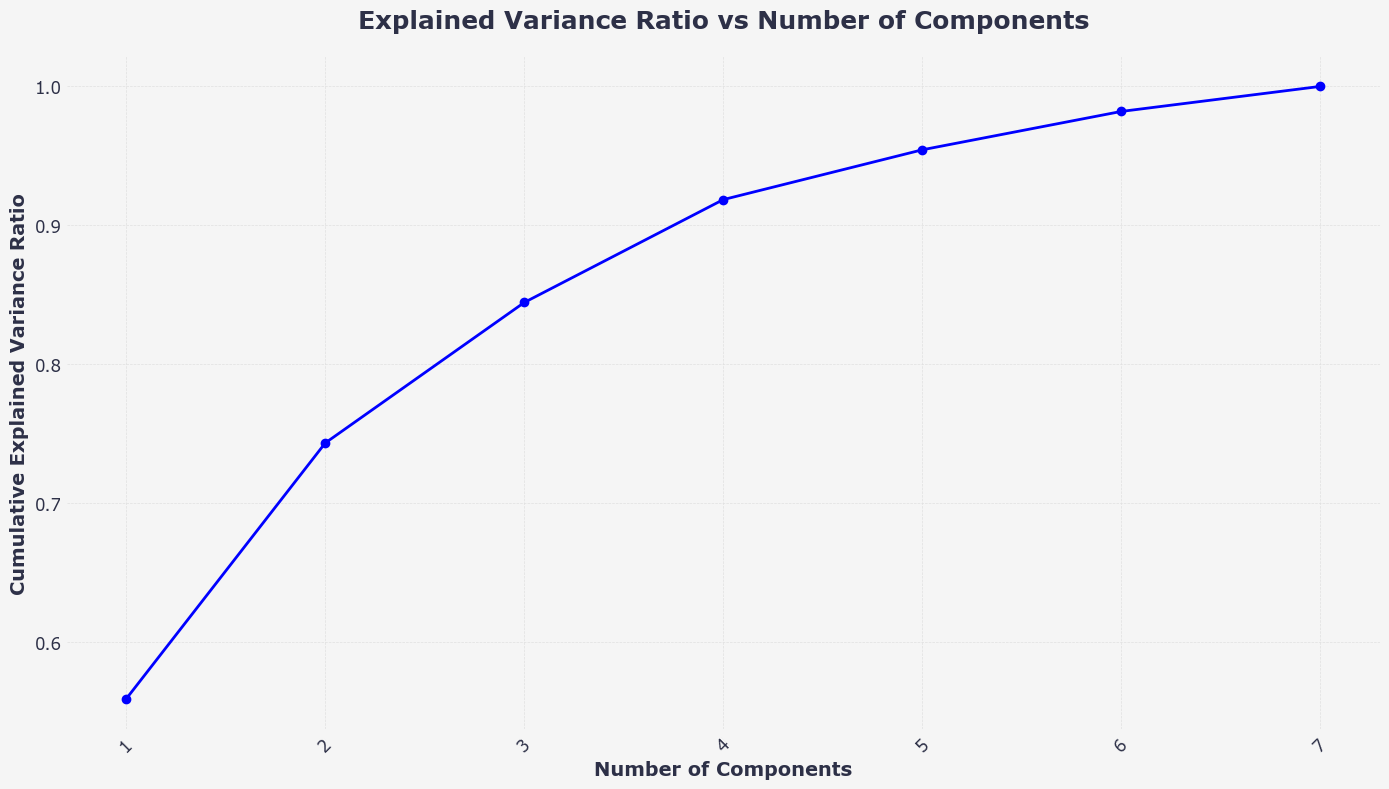

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical columns for PCA
numeric_cols = ['Happiness', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']
X = happy_df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), 
         cumulative_variance_ratio, 
         'bo-', 
         linewidth=2)

set_plot_titles('Explained Variance Ratio vs Number of Components', 'Number of Components', 'Cumulative Explained Variance Ratio')


In [ ]:
# Print explained variance ratio for each component
print("\nExplained variance ratio by component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

# Create a DataFrame with component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))],
    index=numeric_cols
)


Explained variance ratio by component:
PC1: 0.559 (55.9%)
PC2: 0.184 (18.4%)
PC3: 0.101 (10.1%)
PC4: 0.074 (7.4%)
PC5: 0.036 (3.6%)
PC6: 0.028 (2.8%)
PC7: 0.018 (1.8%)


In [ ]:
# Calculate and print cumulative variance explained
print("\nCumulative variance explained:")
for i, cum_var in enumerate(cumulative_variance_ratio):
    print(f"First {i+1} components: {cum_var:.3f} ({cum_var*100:.1f}%)")

# Calculate optimal number of components for 90% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(f"\nNumber of components needed for 90% variance explained: {n_components}")


Cumulative variance explained:
First 1 components: 0.559 (55.9%)
First 2 components: 0.743 (74.3%)
First 3 components: 0.844 (84.4%)
First 4 components: 0.918 (91.8%)
First 5 components: 0.954 (95.4%)
First 6 components: 0.982 (98.2%)
First 7 components: 1.000 (100.0%)

Number of components needed for 90% variance explained: 4


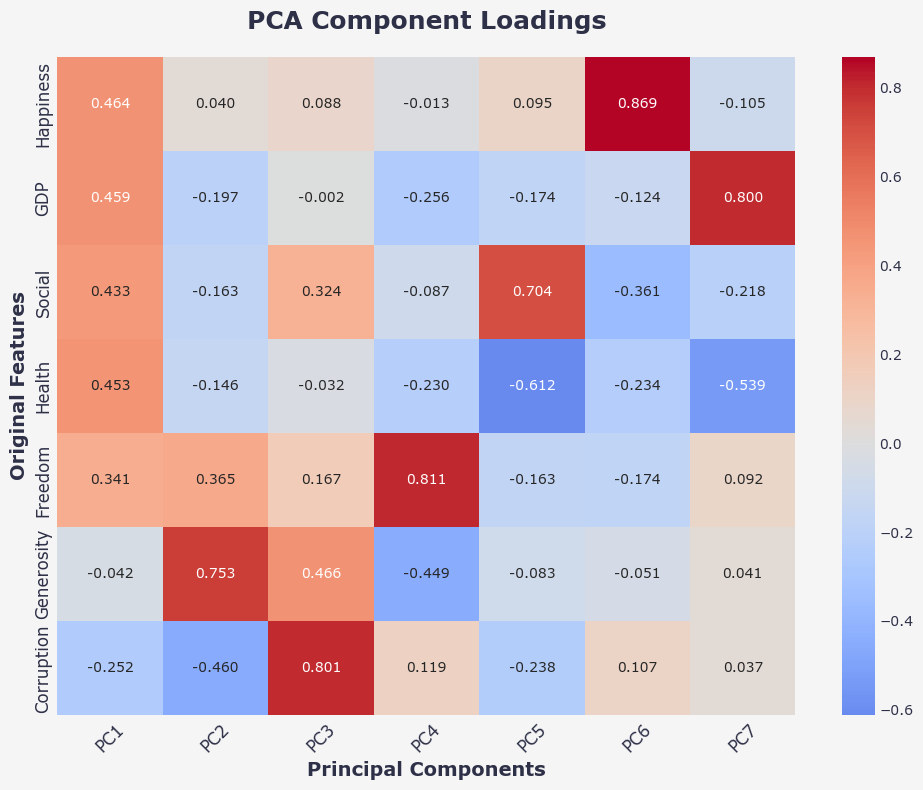

In [ ]:
# Plot heatmap of component loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f')
set_plot_titles('PCA Component Loadings', 'Principal Components', 'Original Features')


The heatmap provides a visual overview of how the original features contribute to the principal components (PCs) that were derived through Principal Component Analysis (PCA). Each cell in the heatmap represents the relationship, or "loading," of an original feature on a principal component. The colors in the heatmap show the strength and direction of these loadings, with red shades indicating positive loadings and blue shades representing negative ones.

Looking at the individual components, Principal Component 1 (PC1) shows strong positive associations with features like Happiness, GDP, Social Support, and Health. This suggests that PC1 reflects factors related to overall well-being and economic prosperity. On the other hand, Principal Component 2 (PC2) highlights the importance of Generosity and Freedom, with a strong negative relationship to Corruption. This indicates that PC2 captures elements of the social and political environment.

Principal Component 3 (PC3) has notable positive loadings for Corruption and Social Support, pointing to a combination of factors related to the societal support systems and perceptions of corruption. Meanwhile, Principal Component 4 (PC4) emphasizes Freedom and a negative relationship with Generosity, reflecting the balance between individual freedoms and social generosity.

In Principal Component 5 (PC5), Social Support stands out positively, while Health has a negative loading. This shows a relationship between the support networks people have and their health status. Principal Component 6 (PC6) highlights a strong connection between Happiness and GDP, underlining the link between personal happiness and economic wealth.

Lastly, Principal Component 7 (PC7) reflects a high positive loading for GDP and a negative loading for Happiness, suggesting a complex relationship between economic prosperity and overall well-being.

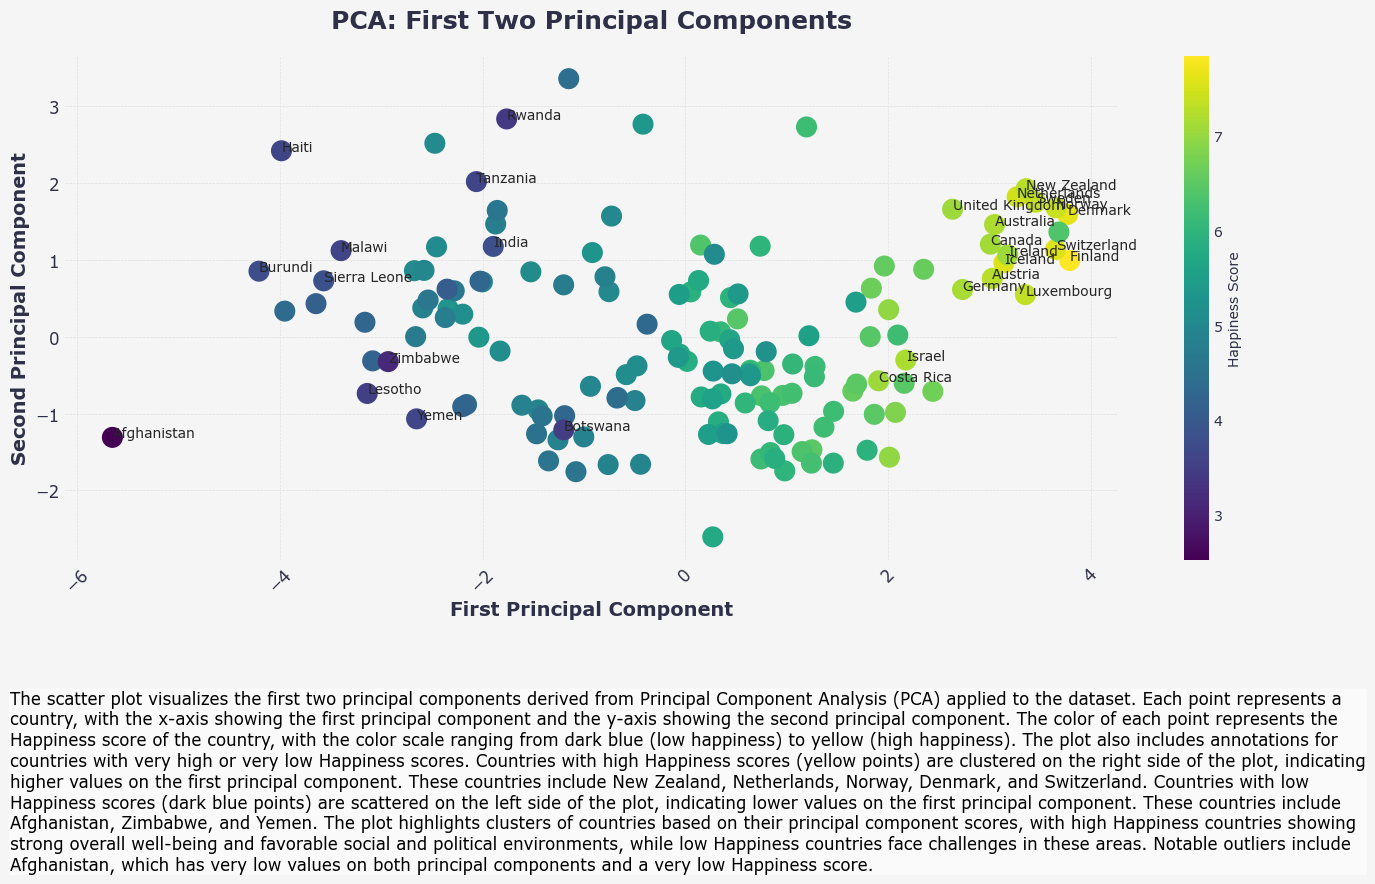

In [ ]:

# Create scatter plot of first two principal components
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=happy_df['Happiness'],
                     cmap='viridis',
                     s=200
)
plt.colorbar(scatter, label='Happiness Score')

# Add country labels for some points
for i, country in enumerate(happy_df['Country']):
    if happy_df['Happiness'].iloc[i] > 7 or happy_df['Happiness'].iloc[i] < 4:
        plt.annotate(country, (X_pca[i, 0], X_pca[i, 1]))


set_plot_titles('PCA: First Two Principal Components', 'First Principal Component', 'Second Principal Component')
interpretation_text = (
    "The scatter plot visualizes the first two principal components derived from Principal Component Analysis (PCA) applied to the dataset. "
    "Each point represents a country, with the x-axis showing the first principal component and the y-axis showing the second principal component. "
    "The color of each point represents the Happiness score of the country, with the color scale ranging from dark blue (low happiness) to yellow (high happiness). "
    "The plot also includes annotations for countries with very high or very low Happiness scores. "
    "Countries with high Happiness scores (yellow points) are clustered on the right side of the plot, indicating higher values on the first principal component. "
    "These countries include New Zealand, Netherlands, Norway, Denmark, and Switzerland. "
    "Countries with low Happiness scores (dark blue points) are scattered on the left side of the plot, indicating lower values on the first principal component. "
    "These countries include Afghanistan, Zimbabwe, and Yemen. "
    "The plot highlights clusters of countries based on their principal component scores, with high Happiness countries showing strong overall well-being and favorable social and political environments, "
    "while low Happiness countries face challenges in these areas. "
    "Notable outliers include Afghanistan, which has very low values on both principal components and a very low Happiness score."
)

add_interpretation(interpretation_text)

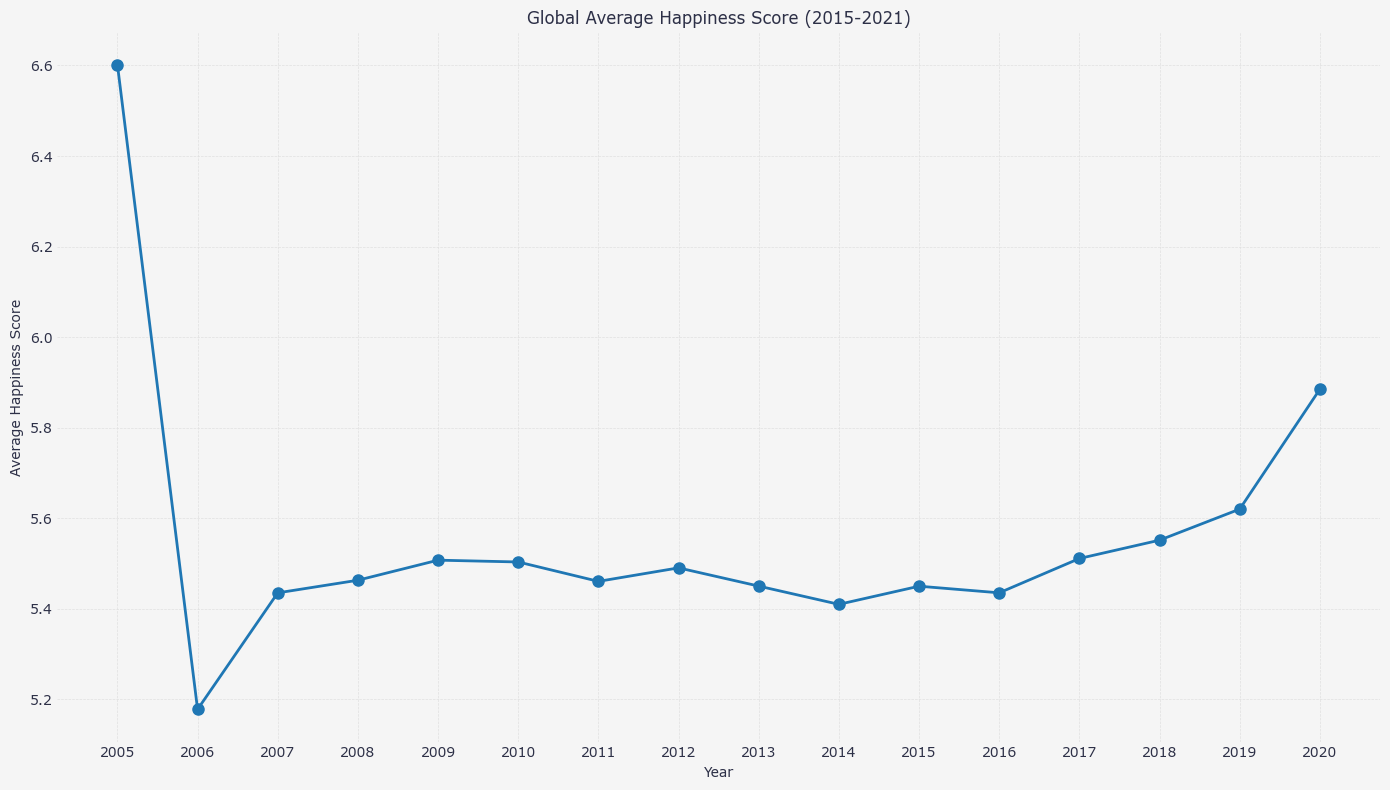

In [ ]:
yearly_avg_df = merged_df.groupby('Year')['Happiness'].mean().reset_index()
plt.plot(yearly_avg_df['Year'], yearly_avg_df['Happiness'], 
         marker='o', linewidth=2, markersize=8)
plt.title('Global Average Happiness Score (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.xticks(yearly_avg_df['Year'])
plt.tight_layout()
plt.show()

### Summary of Key Insights and Interesting Findings

this notebook offers a deep dive into the various factors that contribute to happiness, highlighting the complex relationship between **economic**, **social**, and **political** factors across different regions. Understanding this interplay is crucial in shaping policies and practices that improve overall well-being globally.
    
#### Dataset Overview

This analysis is based on the **World Happiness Report 2021**, which covers data from **149 countries** across **10 regions**. The data comes from the **2021 report**, which draws from the **Gallup World Poll** and official statistics.

#### Key Columns:
- **Country name**: The name of each country included in the study.
- **Regional indicator**: Identifies the region each country belongs to.
- **Ladder score**: The primary measure of happiness for each country.
- **Logged GDP per capita**: Represents the economic prosperity of each country.
- **Social support**: Reflects the strength of personal relationships in each country.
- **Healthy life expectancy**: The number of years a newborn is expected to live in good health.
- **Freedom to make life choices**: Measures how free people feel to make decisions about their lives.
- **Generosity**: The average amount people donate to charity in each country.
- **Perceptions of corruption**: Measures the level of trust people have in their country’s institutions.

#### Key Correlations and Insights
- **Happiness vs. GDP per capita**:  
   There is a **strong positive correlation** between a country’s GDP and its happiness score — richer countries tend to be happier. However, some **Latin American countries** defy this trend, maintaining high happiness despite lower GDP, suggesting that **social and cultural factors** play a significant role.

- **Happiness vs. Social support**:  
   Social support is **the strongest predictor** of happiness. For example, countries like **Costa Rica** rank high in happiness despite having a lower GDP, showing that strong community bonds can have a significant positive impact on well-being.

- **Happiness vs. Corruption**:  
   There’s a **negative correlation** here — countries with higher corruption levels generally report lower happiness. Countries with low perceived corruption, like **Finland** and **Denmark**, enjoy higher happiness levels, proving that trust in institutions matters.

#### Data Visualizations and Interpretations
- **Distribution of Happiness Scores**:  
   Most countries fall within a moderate happiness range, with fewer countries exhibiting extremely high or low happiness scores.

- **Generosity by Region**:  
   Generosity scores vary widely by region, with certain areas showing much higher average donation levels than others.

- **Happiness Scores by Region**:  
   Countries in regions like **North America, ANZ, and Western Europe** have higher average happiness scores, while regions like **Sub-Saharan Africa and South Asia** have lower average scores.

- **GDP Distribution by Region**:  
   **Western Europe**, **North America**, and **ANZ** contribute the largest share to global GDP, while regions like **Sub-Saharan Africa** and **South Asia** account for smaller portions.

- **Correlation Matrix of Happiness Factors**:  
   - **Happiness** shows a **strong positive correlation** with **GDP** (0.79), **Social support** (0.76), and **Health** (0.77).
   - A **moderate positive correlation** exists between **Happiness** and **Freedom** (0.61).
   - **Happiness** is negatively correlated with **Corruption** (-0.42).

- **GDP vs. Happiness Score**:  
   There’s a **positive correlation** between GDP and happiness — as a country’s GDP rises, so does its happiness score. With an **R² value of 0.624**, this indicates a moderately strong relationship.

- **PCA Component Loadings Heatmap**:  
   - **PC1**: Strong positive loadings for **Happiness**, **GDP**, **Social support**, and **Health**.
   - **PC2**: Strong positive loadings for **Generosity** and **Freedom**, and a high negative loading for **Corruption**.
   - **PC3**: Strong positive loadings for **Corruption** and **Social support**.

- **PCA Scatter Plot**:  
   - **High Happiness Scores** are clustered on the right, corresponding to higher values on the first principal component.
   - **Low Happiness Scores** are scattered on the left side, indicating lower values on the first principal component.
   - **Notable outliers**: Afghanistan stands out with very low values for both principal components and a very low happiness score.


The **World Happiness Report** reveals that happiness isn’t determined by just one factor. Instead, it’s influenced by a mix of:

- **Economic strength**: While **GDP per capita** is important, it’s not the whole picture.
- **Social connections**: Having a supportive community can significantly boost happiness, even without significant wealth.
- **Health and freedom**: A long, healthy life and the freedom to make personal choices are key contributors to happiness.
- **Trust in institutions**: Low corruption levels contribute to a higher sense of national well-being.

